In [1]:
from pandas import read_csv
from matplotlib import pyplot
import sys
import numpy as np
import pandas as pd
from datetime import datetime
from keras.utils import to_categorical


In [2]:
colors = ['#BB0000', '#0000BB', 'green','red', 'yellow', 'pink']

def prinUserSensorData(dataS, label,s):
    df = pd.DataFrame()
    ts=[]
    ls=[]
    #print(dataS.shape)
    for t in range(0,dataS.shape[0]):
        ts.append(dataS[t][0])
    df['Time']=ts
    #print(ts)
#    for s in range(1,dataS.shape[1]):
    ls.append(label+" #column-"+str(s))
    #print(dataS[:,s].shape)
    df[label+" #column-"+str(s)]=dataS[:,s]

    print(ls)
    
    df.plot(x="Time",y=ls,subplots=True, legend=True, figsize=(15,5), color=colors[s-1])    
    


In [3]:
import numpy as np

folder = "./data"

users = ["Mix-2labels"]
files = ["B-diagonal1", "B-diagonal1",
         "S-diagonal1", "S-diagonal3",
         "B-doublepoling1", "B-doublepoling2",
         "S-doublepoling1", "S-doublepoling3",
         "B-herringbone1", "B-herringbone2",
         "S-herringbone1", "S-herringbone2",
         "B-kickdoublepoling1", "B-kickdoublepoling2",
         "S-kickdoublepoling2", "S-kickdoublepoling3"]

cross = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

sensors = ["s1", "s2"]

tW = list(range(-5000, 100, 50))

print(tW)
print(len(tW))

tStep = 150

index_t = 0

def getAVG(vs):
    if len(vs) == 0:
        return 0
    if np.isnan(np.median(vs)):
        return -1
    return np.median(vs)

def smoothData(data):
    for ix in range(1, 6):
        data[:, ix] = data[:, ix].astype(float)
        lastV = 0.0
        for jx in range(len(data[:, ix])):
            data[jx, ix] = data[jx, ix] * 0.2 + lastV * 0.8
            lastV = data[jx, ix]

def smoothDataTime(data):
    data[:, 0] = data[:, 0].astype(float)
    tA = []
    lastT = -1
    for jx in range(len(data[:, 0])):
        t0 = data[jx, 0]
        if t0 > lastT + 50:
            lastT = t0
            tA.append(t0)
    retV = np.zeros((len(tA), 7))
    for ix in range(1, 7):
        data[:, ix] = data[:, ix].astype(float)
        lastT = -1
        lV = []
        vA = []
        for jx in range(len(data[:, ix])):
            t0 = data[jx, 0]
            if t0 > lastT + 50:
                lastT = t0
                vA.append(np.median(lV))
                lV = []
            else:
                lV.append(data[jx, ix])
        retV[:, ix] = np.array(vA)
    retV[:, 0] = np.array(tA)
    return retV

def cleanDataFile(filename):
    ret = []
    count = 0
    with open(filename) as file:
        next(file)
        for line0 in file:
            count += 1
            line = line0.strip()
            line = line.replace(',', '.').split('\t')
            if len(line) != 7:
                print("NOT 7# in ", count, " -> ", line)
                continue
            try:
                ret.append([float(x) for x in line])
            except ValueError as e:
                print("Error in line ", line, ":", e)
    return ret

def getLabels(t0, labels):
    for l in labels:
        if l[0] <= t0 <= l[1]:
            return l[2]
    return None


[-5000, -4950, -4900, -4850, -4800, -4750, -4700, -4650, -4600, -4550, -4500, -4450, -4400, -4350, -4300, -4250, -4200, -4150, -4100, -4050, -4000, -3950, -3900, -3850, -3800, -3750, -3700, -3650, -3600, -3550, -3500, -3450, -3400, -3350, -3300, -3250, -3200, -3150, -3100, -3050, -3000, -2950, -2900, -2850, -2800, -2750, -2700, -2650, -2600, -2550, -2500, -2450, -2400, -2350, -2300, -2250, -2200, -2150, -2100, -2050, -2000, -1950, -1900, -1850, -1800, -1750, -1700, -1650, -1600, -1550, -1500, -1450, -1400, -1350, -1300, -1250, -1200, -1150, -1100, -1050, -1000, -950, -900, -850, -800, -750, -700, -650, -600, -550, -500, -450, -400, -350, -300, -250, -200, -150, -100, -50, 0, 50]
102


In [4]:
#for ixu,us in enumerate(users):    
    #for ixc,cl in enumerate(files):
            #for isx,sn in enumerate(sensors):
                #idx_sensor[sn]=[]
                #print(folder+"/"+us+"/"+cl+"/"+str(sn)+".txt")
                #data=cleanDataFile(folder+"/"+us+"/"+cl+"/"+str(sn)+".txt")
                #data=np.array(data)
                #print(data.shape)
                #data=smoothDataTime(data)
                #print(data.shape)
                #for s in range(1,7):
                #    prinUserSensorData(data, "us:"+us+"file:"+cl+"#sensor:"+sn,s)

In [5]:
X=[]
Y=[]
S=[]
N=0



for ixu,us in enumerate(users):    
    for ixc,cl in enumerate(files):
            t0=0
            tMaxMin=sys.maxsize 
            interval=False
            #idx_sensor={}
            sensorData={}
            for isx,sn in enumerate(sensors):
                #idx_sensor[sn]=[]
                print(folder+"/"+us+"/"+cl+"/"+str(sn)+".txt")
                data=cleanDataFile(folder+"/"+us+"/"+cl+"/"+str(sn)+".txt")
                data=np.array(data)
                smoothData(data)
                #prinUserSensorData(data)
                sensorData[sn]=data
                tMax=0
                tMin=sys.maxsize 
                for ixd,d in enumerate(data):
                    #idx_sensor[sn].append(ixd)
                    if(d[index_t]>tMax):
                        tMax=d[index_t]
                    if(d[index_t]<tMin):
                        tMin=d[index_t]                        
                tMaxMin=min(tMaxMin,tMax-tMin)
                
            labels=read_csv(folder+"/"+us+"/"+cl+"/info.txt", sep="\t",parse_dates=True,header=None, decimal=".")
            labels=labels.values
            print(labels)
            
            tMaxMin=int(tMaxMin)
            print(cl," tMaxMin:",tMaxMin)
                        
            for t in range(0-min(tW),tMaxMin-max(tW),tStep):
                print(t/(tMaxMin-max(tW))*100, "t#",t)
                
                label=getLabels(t,labels)
                if (not label):
                    continue
                xi=[]
                for sn in sensors:
                    data=sensorData[sn]
                    tRef=np.min(data[:,index_t])

                    
                    xi1=[]
                    xi2=[]
                    xi3=[]
                    xi4=[]
                    xi5=[]
                    xi6=[]
                    for it in range(len(tW)-2,-1,-1):

                        tr=t+tRef+np.random.normal(0, 25)

                        t0=tr+tW[it]
                        tN=tr+tW[it+1]
                        ag1=data[np.where((data[:,index_t] >= t0) & (data[:,index_t] <=  tN))]
                        #print("\t t0,tN,#,t,it,tRef",t0,tN,len(ag1),t,it,tW[it],tRef)
                        #print("cl",cl,"sc",sc,"sn",sn,"t+:",t,"tRef:",tRef,"t0:",t0,"tN:",tN," ag1:", ag1)
                        #ag0=data[np.where((data[:,index_t] >= tr-5000) & (data[:,index_t] <=  tr+5000))]
                        
                        

                        #añadimos info sensores inerciales
                        xi1.append(getAVG(ag1[:,4].astype(float)))
                        xi2.append(getAVG(ag1[:,5].astype(float)))
                        xi3.append(getAVG(ag1[:,6].astype(float)))
                        
                        #xi4.append(getAVG(ag1[:,4].astype(np.float)))
                        #xi5.append(getAVG(ag1[:,5].astype(np.float)))
                        #xi6.append(getAVG(ag1[:,6].astype(np.float)))                        

                    #print("\t",np.array(xi1).shape)
                    xi.append(xi1)
                    xi.append(xi2)
                    xi.append(xi3)
                    #xi.append(xi4)
                    #xi.append(xi5)
                    #xi.append(xi6)

                #print("",np.array(xi).shape)    
                X.append(np.transpose(xi))
                Y.append(label)
                print(len(cross))
                S.append(cross[ixc])

        
X=np.array(X)
S=np.array(S)
Y=np.array(Y)

print(X.shape)
print(Y.shape)    
print(S.shape) 

                

./data/Mix-2labels/B-diagonal1/s1.txt
./data/Mix-2labels/B-diagonal1/s2.txt
[[28000 90000 'Beret']
 [160000 220000 'Beret']]
B-diagonal1  tMaxMin: 755719
0.6616653587748075 t# 5000
0.6815153195380518 t# 5150
0.701365280301296 t# 5300
0.7212152410645402 t# 5450
0.7410652018277843 t# 5600
0.7609151625910286 t# 5750
0.7807651233542728 t# 5900
0.8006150841175171 t# 6050
0.8204650448807613 t# 6200
0.8403150056440055 t# 6350
0.8601649664072498 t# 6500
0.880014927170494 t# 6650
0.8998648879337382 t# 6800
0.9197148486969824 t# 6950
0.9395648094602267 t# 7100
0.9594147702234709 t# 7250
0.9792647309867151 t# 7400
0.9991146917499593 t# 7550
1.0189646525132035 t# 7700
1.0388146132764478 t# 7850
1.058664574039692 t# 8000
1.0785145348029361 t# 8150
1.0983644955661804 t# 8300
1.1182144563294245 t# 8450
1.1380644170926688 t# 8600
1.1579143778559131 t# 8750
1.1777643386191572 t# 8900
1.1976142993824015 t# 9050
1.2174642601456458 t# 9200
1.23731422090889 t# 9350
1.2571641816721344 t# 9500
1.277014142435

16
6.2990542155361675 t# 47600
16
6.318904176299411 t# 47750
16
6.338754137062656 t# 47900
16
6.3586040978259 t# 48050
16
6.378454058589145 t# 48200
16
6.398304019352389 t# 48350
16
6.418153980115633 t# 48500
16
6.438003940878876 t# 48650
16
6.457853901642122 t# 48800
16
6.477703862405365 t# 48950
16
6.49755382316861 t# 49100
16
6.5174037839318535 t# 49250
16
6.537253744695098 t# 49400
16
6.557103705458342 t# 49550
16
6.576953666221587 t# 49700
16
6.596803626984831 t# 49850
16
6.616653587748075 t# 50000
16
6.636503548511319 t# 50150
16
6.656353509274564 t# 50300
16
6.676203470037807 t# 50450
16
6.696053430801053 t# 50600
16
6.715903391564296 t# 50750
16
6.73575335232754 t# 50900
16
6.755603313090784 t# 51050
16
6.775453273854029 t# 51200
16
6.795303234617273 t# 51350
16
6.815153195380518 t# 51500
16
6.835003156143761 t# 51650
16
6.854853116907006 t# 51800
16
6.874703077670249 t# 51950
16
6.894553038433495 t# 52100
16
6.914402999196738 t# 52250
16
6.9342529599599825 t# 52400
16
6.954102

16
11.698243543138597 t# 88400
16
11.71809350390184 t# 88550
16
11.737943464665085 t# 88700
16
11.757793425428329 t# 88850
16
11.777643386191574 t# 89000
16
11.797493346954816 t# 89150
16
11.817343307718062 t# 89300
16
11.837193268481307 t# 89450
16
11.85704322924455 t# 89600
16
11.876893190007795 t# 89750
16
11.896743150771039 t# 89900
16
11.916593111534283 t# 90050
11.936443072297527 t# 90200
11.956293033060772 t# 90350
11.976142993824016 t# 90500
11.99599295458726 t# 90650
12.015842915350504 t# 90800
12.03569287611375 t# 90950
12.055542836876992 t# 91100
12.075392797640237 t# 91250
12.095242758403481 t# 91400
12.115092719166725 t# 91550
12.134942679929969 t# 91700
12.154792640693215 t# 91850
12.174642601456458 t# 92000
12.194492562219702 t# 92150
12.214342522982946 t# 92300
12.234192483746192 t# 92450
12.254042444509434 t# 92600
12.27389240527268 t# 92750
12.293742366035923 t# 92900
12.313592326799167 t# 93050
12.333442287562411 t# 93200
12.353292248325657 t# 93350
12.3731422090889 

16
21.226224709495824 t# 160400
16
21.24607467025907 t# 160550
16
21.265924631022312 t# 160700
16
21.285774591785554 t# 160850
16
21.305624552548803 t# 161000
16
21.325474513312045 t# 161150
16
21.34532447407529 t# 161300
16
21.365174434838533 t# 161450
16
21.38502439560178 t# 161600
16
21.40487435636502 t# 161750
16
21.424724317128266 t# 161900
16
21.44457427789151 t# 162050
16
21.464424238654757 t# 162200
16
21.484274199418 t# 162350
16
21.50412416018124 t# 162500
16
21.523974120944487 t# 162650
16
21.543824081707733 t# 162800
16
21.563674042470975 t# 162950
16
21.58352400323422 t# 163100
16
21.603373963997463 t# 163250
16
21.62322392476071 t# 163400
16
21.643073885523954 t# 163550
16
21.662923846287196 t# 163700
16
21.68277380705044 t# 163850
16
21.702623767813687 t# 164000
16
21.72247372857693 t# 164150
16
21.742323689340175 t# 164300
16
21.76217365010342 t# 164450
16
21.782023610866663 t# 164600
16
21.80187357162991 t# 164750
16
21.82172353239315 t# 164900
16
21.841573493156396 t#

16
26.40706446870257 t# 199550
16
26.42691442946581 t# 199700
16
26.446764390229056 t# 199850
16
26.4666143509923 t# 200000
16
26.48646431175554 t# 200150
16
26.50631427251879 t# 200300
16
26.526164233282035 t# 200450
16
26.546014194045277 t# 200600
16
26.565864154808523 t# 200750
16
26.58571411557176 t# 200900
16
26.605564076335007 t# 201050
16
26.625414037098256 t# 201200
16
26.645263997861495 t# 201350
16
26.665113958624744 t# 201500
16
26.68496391938799 t# 201650
16
26.704813880151228 t# 201800
16
26.724663840914474 t# 201950
16
26.744513801677716 t# 202100
16
26.76436376244096 t# 202250
16
26.78421372320421 t# 202400
16
26.80406368396745 t# 202550
16
26.823913644730695 t# 202700
16
26.84376360549394 t# 202850
16
26.863613566257182 t# 203000
16
26.883463527020428 t# 203150
16
26.90331348778367 t# 203300
16
26.923163448546916 t# 203450
16
26.94301340931016 t# 203600
16
26.962863370073404 t# 203750
16
26.98271333083665 t# 203900
16
27.002563291599895 t# 204050
16
27.022413252363137 t

./data/Mix-2labels/B-diagonal1/s2.txt
[[28000 90000 'Beret']
 [160000 220000 'Beret']]
B-diagonal1  tMaxMin: 755719
0.6616653587748075 t# 5000
0.6815153195380518 t# 5150
0.701365280301296 t# 5300
0.7212152410645402 t# 5450
0.7410652018277843 t# 5600
0.7609151625910286 t# 5750
0.7807651233542728 t# 5900
0.8006150841175171 t# 6050
0.8204650448807613 t# 6200
0.8403150056440055 t# 6350
0.8601649664072498 t# 6500
0.880014927170494 t# 6650
0.8998648879337382 t# 6800
0.9197148486969824 t# 6950
0.9395648094602267 t# 7100
0.9594147702234709 t# 7250
0.9792647309867151 t# 7400
0.9991146917499593 t# 7550
1.0189646525132035 t# 7700
1.0388146132764478 t# 7850
1.058664574039692 t# 8000
1.0785145348029361 t# 8150
1.0983644955661804 t# 8300
1.1182144563294245 t# 8450
1.1380644170926688 t# 8600
1.1579143778559131 t# 8750
1.1777643386191572 t# 8900
1.1976142993824015 t# 9050
1.2174642601456458 t# 9200
1.23731422090889 t# 9350
1.2571641816721344 t# 9500
1.2770141424353785 t# 9650
1.2968641031986228 t# 980

16
6.279204254772923 t# 47450
16
6.2990542155361675 t# 47600
16
6.318904176299411 t# 47750
16
6.338754137062656 t# 47900
16
6.3586040978259 t# 48050
16
6.378454058589145 t# 48200
16
6.398304019352389 t# 48350
16
6.418153980115633 t# 48500
16
6.438003940878876 t# 48650
16
6.457853901642122 t# 48800
16
6.477703862405365 t# 48950
16
6.49755382316861 t# 49100
16
6.5174037839318535 t# 49250
16
6.537253744695098 t# 49400
16
6.557103705458342 t# 49550
16
6.576953666221587 t# 49700
16
6.596803626984831 t# 49850
16
6.616653587748075 t# 50000
16
6.636503548511319 t# 50150
16
6.656353509274564 t# 50300
16
6.676203470037807 t# 50450
16
6.696053430801053 t# 50600
16
6.715903391564296 t# 50750
16
6.73575335232754 t# 50900
16
6.755603313090784 t# 51050
16
6.775453273854029 t# 51200
16
6.795303234617273 t# 51350
16
6.815153195380518 t# 51500
16
6.835003156143761 t# 51650
16
6.854853116907006 t# 51800
16
6.874703077670249 t# 51950
16
6.894553038433495 t# 52100
16
6.914402999196738 t# 52250
16
6.9342529

16
11.698243543138597 t# 88400
16
11.71809350390184 t# 88550
16
11.737943464665085 t# 88700
16
11.757793425428329 t# 88850
16
11.777643386191574 t# 89000
16
11.797493346954816 t# 89150
16
11.817343307718062 t# 89300
16
11.837193268481307 t# 89450
16
11.85704322924455 t# 89600
16
11.876893190007795 t# 89750
16
11.896743150771039 t# 89900
16
11.916593111534283 t# 90050
11.936443072297527 t# 90200
11.956293033060772 t# 90350
11.976142993824016 t# 90500
11.99599295458726 t# 90650
12.015842915350504 t# 90800
12.03569287611375 t# 90950
12.055542836876992 t# 91100
12.075392797640237 t# 91250
12.095242758403481 t# 91400
12.115092719166725 t# 91550
12.134942679929969 t# 91700
12.154792640693215 t# 91850
12.174642601456458 t# 92000
12.194492562219702 t# 92150
12.214342522982946 t# 92300
12.234192483746192 t# 92450
12.254042444509434 t# 92600
12.27389240527268 t# 92750
12.293742366035923 t# 92900
12.313592326799167 t# 93050
12.333442287562411 t# 93200
12.353292248325657 t# 93350
12.3731422090889 

16
21.226224709495824 t# 160400
16
21.24607467025907 t# 160550
16
21.265924631022312 t# 160700
16
21.285774591785554 t# 160850
16
21.305624552548803 t# 161000
16
21.325474513312045 t# 161150
16
21.34532447407529 t# 161300
16
21.365174434838533 t# 161450
16
21.38502439560178 t# 161600
16
21.40487435636502 t# 161750
16
21.424724317128266 t# 161900
16
21.44457427789151 t# 162050
16
21.464424238654757 t# 162200
16
21.484274199418 t# 162350
16
21.50412416018124 t# 162500
16
21.523974120944487 t# 162650
16
21.543824081707733 t# 162800
16
21.563674042470975 t# 162950
16
21.58352400323422 t# 163100
16
21.603373963997463 t# 163250
16
21.62322392476071 t# 163400
16
21.643073885523954 t# 163550
16
21.662923846287196 t# 163700
16
21.68277380705044 t# 163850
16
21.702623767813687 t# 164000
16
21.72247372857693 t# 164150
16
21.742323689340175 t# 164300
16
21.76217365010342 t# 164450
16
21.782023610866663 t# 164600
16
21.80187357162991 t# 164750
16
21.82172353239315 t# 164900
16
21.841573493156396 t#

16
26.42691442946581 t# 199700
16
26.446764390229056 t# 199850
16
26.4666143509923 t# 200000
16
26.48646431175554 t# 200150
16
26.50631427251879 t# 200300
16
26.526164233282035 t# 200450
16
26.546014194045277 t# 200600
16
26.565864154808523 t# 200750
16
26.58571411557176 t# 200900
16
26.605564076335007 t# 201050
16
26.625414037098256 t# 201200
16
26.645263997861495 t# 201350
16
26.665113958624744 t# 201500
16
26.68496391938799 t# 201650
16
26.704813880151228 t# 201800
16
26.724663840914474 t# 201950
16
26.744513801677716 t# 202100
16
26.76436376244096 t# 202250
16
26.78421372320421 t# 202400
16
26.80406368396745 t# 202550
16
26.823913644730695 t# 202700
16
26.84376360549394 t# 202850
16
26.863613566257182 t# 203000
16
26.883463527020428 t# 203150
16
26.90331348778367 t# 203300
16
26.923163448546916 t# 203450
16
26.94301340931016 t# 203600
16
26.962863370073404 t# 203750
16
26.98271333083665 t# 203900
16
27.002563291599895 t# 204050
16
27.022413252363137 t# 204200
16
27.042263213126382 

[[1000 25000 'Snozone']
 [50000 75000 'Snozone']
 [100000 128000 'Snozone']
 [155000 180000 'Snozone']
 [210000 235000 'Snozone']]
S-diagonal1  tMaxMin: 262888
1.9023124510154543 t# 5000
16
1.959381824545918 t# 5150
16
2.0164511980763815 t# 5300
16
2.073520571606845 t# 5450
16
2.130589945137309 t# 5600
16
2.1876593186677726 t# 5750
16
2.2447286921982363 t# 5900
16
2.3017980657287 t# 6050
16
2.3588674392591633 t# 6200
16
2.415936812789627 t# 6350
16
2.4730061863200907 t# 6500
16
2.5300755598505544 t# 6650
16
2.5871449333810177 t# 6800
16
2.6442143069114814 t# 6950
16
2.701283680441945 t# 7100
16
2.758353053972409 t# 7250
16
2.8154224275028725 t# 7400
16
2.8724918010333362 t# 7550
16
2.9295611745638 t# 7700
16
2.986630548094263 t# 7850
16
3.043699921624727 t# 8000
16
3.1007692951551906 t# 8150
16
3.1578386686856543 t# 8300
16
3.2149080422161176 t# 8450
16
3.2719774157465817 t# 8600
16
3.329046789277045 t# 8750
16
3.3861161628075087 t# 8900
16
3.443185536337973 t# 9050
16
3.50025490986843

16
19.13726325721547 t# 50300
16
19.194332630745937 t# 50450
16
19.2514020042764 t# 50600
16
19.308471377806864 t# 50750
16
19.365540751337328 t# 50900
16
19.422610124867788 t# 51050
16
19.47967949839825 t# 51200
16
19.536748871928715 t# 51350
16
19.59381824545918 t# 51500
16
19.650887618989643 t# 51650
16
19.707956992520106 t# 51800
16
19.76502636605057 t# 51950
16
19.822095739581037 t# 52100
16
19.8791651131115 t# 52250
16
19.93623448664196 t# 52400
16
19.993303860172425 t# 52550
16
20.05037323370289 t# 52700
16
20.107442607233352 t# 52850
16
20.164511980763816 t# 53000
16
20.22158135429428 t# 53150
16
20.278650727824743 t# 53300
16
20.335720101355207 t# 53450
16
20.39278947488567 t# 53600
16
20.449858848416135 t# 53750
16
20.5069282219466 t# 53900
16
20.563997595477062 t# 54050
16
20.621066969007526 t# 54200
16
20.67813634253799 t# 54350
16
20.735205716068453 t# 54500
16
20.792275089598917 t# 54650
16
20.84934446312938 t# 54800
16
20.906413836659844 t# 54950
16
20.963483210190308 t#

16
38.25550338992079 t# 100550
16
38.31257276345125 t# 100700
16
38.36964213698171 t# 100850
16
38.42671151051218 t# 101000
16
38.48378088404264 t# 101150
16
38.540850257573105 t# 101300
16
38.59791963110357 t# 101450
16
38.65498900463403 t# 101600
16
38.7120583781645 t# 101750
16
38.76912775169496 t# 101900
16
38.82619712522543 t# 102050
16
38.88326649875589 t# 102200
16
38.940335872286354 t# 102350
16
38.997405245816815 t# 102500
16
39.05447461934728 t# 102650
16
39.11154399287774 t# 102800
16
39.16861336640821 t# 102950
16
39.22568273993867 t# 103100
16
39.28275211346913 t# 103250
16
39.3398214869996 t# 103400
16
39.39689086053006 t# 103550
16
39.453960234060524 t# 103700
16
39.511029607590984 t# 103850
16
39.56809898112145 t# 104000
16
39.62516835465191 t# 104150
16
39.68223772818238 t# 104300
16
39.73930710171284 t# 104450
16
39.79637647524331 t# 104600
16
39.853445848773774 t# 104750
16
39.910515222304234 t# 104900
16
39.9675845958347 t# 105050
16
40.02465396936516 t# 105200
16
4

16
59.314102222661866 t# 155900
16
59.371171596192326 t# 156050
16
59.42824096972279 t# 156200
16
59.48531034325326 t# 156350
16
59.54237971678372 t# 156500
16
59.59944909031418 t# 156650
16
59.656518463844655 t# 156800
16
59.713587837375115 t# 156950
16
59.770657210905576 t# 157100
16
59.827726584436036 t# 157250
16
59.88479595796651 t# 157400
16
59.94186533149697 t# 157550
16
59.99893470502743 t# 157700
16
60.05600407855789 t# 157850
16
60.11307345208836 t# 158000
16
60.170142825618825 t# 158150
16
60.227212199149285 t# 158300
16
60.28428157267975 t# 158450
16
60.34135094621021 t# 158600
16
60.39842031974067 t# 158750
16
60.45548969327113 t# 158900
16
60.51255906680161 t# 159050
16
60.56962844033207 t# 159200
16
60.62669781386253 t# 159350
16
60.68376718739299 t# 159500
16
60.74083656092346 t# 159650
16
60.79790593445392 t# 159800
16
60.85497530798438 t# 159950
16
60.91204468151486 t# 160100
16
60.96911405504532 t# 160250
16
61.02618342857578 t# 160400
16
61.08325280210624 t# 160550


16
80.20149293481155 t# 210800
16
80.25856230834202 t# 210950
16
80.31563168187247 t# 211100
16
80.37270105540296 t# 211250
16
80.42977042893341 t# 211400
16
80.48683980246388 t# 211550
16
80.54390917599434 t# 211700
16
80.60097854952481 t# 211850
16
80.65804792305526 t# 212000
16
80.71511729658573 t# 212150
16
80.7721866701162 t# 212300
16
80.82925604364665 t# 212450
16
80.88632541717712 t# 212600
16
80.94339479070757 t# 212750
16
81.00046416423805 t# 212900
16
81.0575335377685 t# 213050
16
81.11460291129897 t# 213200
16
81.17167228482944 t# 213350
16
81.22874165835991 t# 213500
16
81.28581103189036 t# 213650
16
81.34288040542083 t# 213800
16
81.3999497789513 t# 213950
16
81.45701915248176 t# 214100
16
81.51408852601222 t# 214250
16
81.57115789954268 t# 214400
16
81.62822727307315 t# 214550
16
81.68529664660362 t# 214700
16
81.74236602013407 t# 214850
16
81.79943539366454 t# 215000
16
81.856504767195 t# 215150
16
81.91357414072546 t# 215300
16
81.97064351425593 t# 215450
16
82.0277128

./data/Mix-2labels/S-diagonal3/s2.txt
[[10000 30000 'Snozone']
 [53000 75000 'Snozone']
 [100000 128000 'Snozone']
 [150000 175000 'Snozone']
 [200000 225000 'Snozone']]
S-diagonal3  tMaxMin: 248969
2.0086855563456387 t# 5000
2.0689461230360076 t# 5150
2.129206689726377 t# 5300
2.189467256416746 t# 5450
2.249727823107115 t# 5600
2.309988389797484 t# 5750
2.3702489564878535 t# 5900
2.4305095231782228 t# 6050
2.490770089868592 t# 6200
2.551030656558961 t# 6350
2.61129122324933 t# 6500
2.671551789939699 t# 6650
2.7318123566300683 t# 6800
2.7920729233204375 t# 6950
2.852333490010807 t# 7100
2.912594056701176 t# 7250
2.972854623391545 t# 7400
3.033115190081914 t# 7550
3.0933757567722835 t# 7700
3.1536363234626523 t# 7850
3.2138968901530216 t# 8000
3.2741574568433904 t# 8150
3.3344180235337597 t# 8300
3.394678590224129 t# 8450
3.454939156914498 t# 8600
3.515199723604868 t# 8750
3.575460290295237 t# 8900
3.635720856985606 t# 9050
3.695981423675975 t# 9200
3.756241990366344 t# 9350
3.816502557

16
21.653630297405986 t# 53900
16
21.713890864096353 t# 54050
16
21.774151430786723 t# 54200
16
21.83441199747709 t# 54350
16
21.89467256416746 t# 54500
16
21.954933130857828 t# 54650
16
22.0151936975482 t# 54800
16
22.075454264238566 t# 54950
16
22.135714830928936 t# 55100
16
22.195975397619307 t# 55250
16
22.256235964309674 t# 55400
16
22.316496531000045 t# 55550
16
22.376757097690415 t# 55700
16
22.437017664380782 t# 55850
16
22.497278231071153 t# 56000
16
22.55753879776152 t# 56150
16
22.61779936445189 t# 56300
16
22.678059931142258 t# 56450
16
22.73832049783263 t# 56600
16
22.798581064522995 t# 56750
16
22.858841631213366 t# 56900
16
22.919102197903733 t# 57050
16
22.979362764594104 t# 57200
16
23.039623331284474 t# 57350
16
23.099883897974845 t# 57500
16
23.160144464665212 t# 57650
16
23.220405031355583 t# 57800
16
23.280665598045953 t# 57950
16
23.34092616473632 t# 58100
16
23.40118673142669 t# 58250
16
23.461447298117058 t# 58400
16
23.52170786480743 t# 58550
16
23.581968431497

16
40.5754482381819 t# 101000
16
40.635708804872266 t# 101150
16
40.69596937156263 t# 101300
16
40.75622993825301 t# 101450
16
40.816490504943374 t# 101600
16
40.87675107163374 t# 101750
16
40.93701163832411 t# 101900
16
40.99727220501448 t# 102050
16
41.05753277170485 t# 102200
16
41.11779333839522 t# 102350
16
41.17805390508559 t# 102500
16
41.23831447177596 t# 102650
16
41.29857503846633 t# 102800
16
41.3588356051567 t# 102950
16
41.419096171847066 t# 103100
16
41.47935673853744 t# 103250
16
41.53961730522781 t# 103400
16
41.599877871918174 t# 103550
16
41.66013843860855 t# 103700
16
41.720399005298916 t# 103850
16
41.78065957198928 t# 104000
16
41.84092013867965 t# 104150
16
41.901180705370024 t# 104300
16
41.96144127206039 t# 104450
16
42.02170183875076 t# 104600
16
42.081962405441125 t# 104750
16
42.1422229721315 t# 104900
16
42.202483538821866 t# 105050
16
42.26274410551223 t# 105200
16
42.3230046722026 t# 105350
16
42.383265238892974 t# 105500
16
42.44352580558334 t# 105650
16


16
60.340914112622976 t# 150200
16
60.40117467931335 t# 150350
16
60.461435246003724 t# 150500
16
60.52169581269409 t# 150650
16
60.58195637938446 t# 150800
16
60.642216946074825 t# 150950
16
60.7024775127652 t# 151100
16
60.762738079455566 t# 151250
16
60.82299864614593 t# 151400
16
60.88325921283631 t# 151550
16
60.94351977952668 t# 151700
16
61.00378034621704 t# 151850
16
61.064040912907416 t# 152000
16
61.124301479597776 t# 152150
16
61.18456204628815 t# 152300
16
61.244822612978524 t# 152450
16
61.305083179668884 t# 152600
16
61.36534374635926 t# 152750
16
61.42560431304963 t# 152900
16
61.48586487973999 t# 153050
16
61.546125446430366 t# 153200
16
61.606386013120726 t# 153350
16
61.6666465798111 t# 153500
16
61.726907146501475 t# 153650
16
61.787167713191835 t# 153800
16
61.84742827988221 t# 153950
16
61.90768884657258 t# 154100
16
61.96794941326294 t# 154250
16
62.02820997995332 t# 154400
16
62.08847054664369 t# 154550
16
62.14873111333405 t# 154700
16
62.208991680024425 t# 1548

16
80.52820395389665 t# 200450
16
80.58846452058702 t# 200600
16
80.64872508727738 t# 200750
16
80.70898565396776 t# 200900
16
80.76924622065813 t# 201050
16
80.82950678734849 t# 201200
16
80.88976735403887 t# 201350
16
80.95002792072923 t# 201500
16
81.0102884874196 t# 201650
16
81.07054905410997 t# 201800
16
81.13080962080033 t# 201950
16
81.19107018749071 t# 202100
16
81.25133075418108 t# 202250
16
81.31159132087144 t# 202400
16
81.37185188756182 t# 202550
16
81.43211245425218 t# 202700
16
81.49237302094255 t# 202850
16
81.55263358763293 t# 203000
16
81.61289415432329 t# 203150
16
81.67315472101366 t# 203300
16
81.73341528770403 t# 203450
16
81.7936758543944 t# 203600
16
81.85393642108477 t# 203750
16
81.91419698777514 t# 203900
16
81.9744575544655 t# 204050
16
82.03471812115588 t# 204200
16
82.09497868784624 t# 204350
16
82.15523925453661 t# 204500
16
82.21549982122698 t# 204650
16
82.27576038791736 t# 204800
16
82.33602095460772 t# 204950
16
82.39628152129809 t# 205100
16
82.45654

./data/Mix-2labels/B-doublepoling1/s2.txt
[[28000 90000 'Beret']
 [185000 250000 'Beret']
 [350000 415000 'Beret']]
B-doublepoling1  tMaxMin: 831308
0.6014979705458474 t# 5000
0.6195429096622228 t# 5150
0.6375878487785982 t# 5300
0.6556327878949737 t# 5450
0.6736777270113491 t# 5600
0.6917226661277245 t# 5750
0.7097676052440999 t# 5900
0.7278125443604754 t# 6050
0.7458574834768508 t# 6200
0.7639024225932262 t# 6350
0.7819473617096016 t# 6500
0.799992300825977 t# 6650
0.8180372399423523 t# 6800
0.8360821790587278 t# 6950
0.8541271181751032 t# 7100
0.8721720572914787 t# 7250
0.8902169964078541 t# 7400
0.9082619355242296 t# 7550
0.9263068746406049 t# 7700
0.9443518137569804 t# 7850
0.9623967528733558 t# 8000
0.9804416919897313 t# 8150
0.9984866311061066 t# 8300
1.0165315702224822 t# 8450
1.0345765093388575 t# 8600
1.052621448455233 t# 8750
1.0706663875716083 t# 8900
1.0887113266879838 t# 9050
1.106756265804359 t# 9200
1.1248012049207345 t# 9350
1.14284614403711 t# 9500
1.1608910831534855 

16
5.672125862247341 t# 47150
16
5.690170801363716 t# 47300
16
5.7082157404800915 t# 47450
16
5.726260679596467 t# 47600
16
5.7443056187128425 t# 47750
16
5.762350557829218 t# 47900
16
5.780395496945593 t# 48050
16
5.798440436061969 t# 48200
16
5.8164853751783445 t# 48350
16
5.83453031429472 t# 48500
16
5.852575253411095 t# 48650
16
5.87062019252747 t# 48800
16
5.888665131643846 t# 48950
16
5.906710070760221 t# 49100
16
5.924755009876597 t# 49250
16
5.942799948992972 t# 49400
16
5.960844888109348 t# 49550
16
5.978889827225723 t# 49700
16
5.996934766342099 t# 49850
16
6.014979705458474 t# 50000
16
6.033024644574849 t# 50150
16
6.051069583691224 t# 50300
16
6.0691145228076 t# 50450
16
6.087159461923976 t# 50600
16
6.105204401040351 t# 50750
16
6.123249340156726 t# 50900
16
6.141294279273102 t# 51050
16
6.159339218389477 t# 51200
16
6.177384157505853 t# 51350
16
6.195429096622227 t# 51500
16
6.213474035738603 t# 51650
16
6.231518974854979 t# 51800
16
6.249563913971355 t# 51950
16
6.267608

16
10.616439180134206 t# 88250
16
10.634484119250581 t# 88400
16
10.652529058366957 t# 88550
16
10.670573997483332 t# 88700
16
10.688618936599708 t# 88850
16
10.706663875716083 t# 89000
16
10.724708814832459 t# 89150
16
10.742753753948834 t# 89300
16
10.76079869306521 t# 89450
16
10.778843632181585 t# 89600
16
10.796888571297961 t# 89750
16
10.814933510414336 t# 89900
16
10.832978449530712 t# 90050
10.851023388647087 t# 90200
10.869068327763461 t# 90350
10.887113266879837 t# 90500
10.905158205996212 t# 90650
10.923203145112588 t# 90800
10.941248084228963 t# 90950
10.959293023345339 t# 91100
10.977337962461714 t# 91250
10.995382901578092 t# 91400
11.013427840694465 t# 91550
11.03147277981084 t# 91700
11.049517718927216 t# 91850
11.067562658043592 t# 92000
11.085607597159967 t# 92150
11.103652536276343 t# 92300
11.121697475392718 t# 92450
11.139742414509094 t# 92600
11.15778735362547 t# 92750
11.175832292741845 t# 92900
11.19387723185822 t# 93050
11.211922170974594 t# 93200
11.2299671100

16
22.291514788429104 t# 185300
16
22.30955972754548 t# 185450
16
22.327604666661856 t# 185600
16
22.34564960577823 t# 185750
16
22.363694544894607 t# 185900
16
22.381739484010982 t# 186050
16
22.399784423127358 t# 186200
16
22.417829362243733 t# 186350
16
22.435874301360105 t# 186500
16
22.453919240476484 t# 186650
16
22.471964179592856 t# 186800
16
22.490009118709235 t# 186950
16
22.508054057825607 t# 187100
16
22.526098996941986 t# 187250
16
22.544143936058358 t# 187400
16
22.562188875174733 t# 187550
16
22.580233814291113 t# 187700
16
22.598278753407484 t# 187850
16
22.616323692523864 t# 188000
16
22.634368631640235 t# 188150
16
22.652413570756615 t# 188300
16
22.670458509872986 t# 188450
16
22.688503448989366 t# 188600
16
22.706548388105738 t# 188750
16
22.724593327222113 t# 188900
16
22.74263826633849 t# 189050
16
22.760683205454864 t# 189200
16
22.77872814457124 t# 189350
16
22.796773083687615 t# 189500
16
22.81481802280399 t# 189650
16
22.832862961920366 t# 189800
16
22.8509079

16
26.983198958686717 t# 224300
16
27.00124389780309 t# 224450
16
27.019288836919465 t# 224600
16
27.037333776035837 t# 224750
16
27.055378715152216 t# 224900
16
27.07342365426859 t# 225050
16
27.091468593384967 t# 225200
16
27.10951353250134 t# 225350
16
27.127558471617718 t# 225500
16
27.145603410734093 t# 225650
16
27.163648349850465 t# 225800
16
27.18169328896684 t# 225950
16
27.19973822808322 t# 226100
16
27.217783167199595 t# 226250
16
27.235828106315967 t# 226400
16
27.253873045432346 t# 226550
16
27.271917984548722 t# 226700
16
27.289962923665094 t# 226850
16
27.30800786278147 t# 227000
16
27.32605280189785 t# 227150
16
27.344097741014224 t# 227300
16
27.362142680130596 t# 227450
16
27.38018761924697 t# 227600
16
27.39823255836335 t# 227750
16
27.416277497479726 t# 227900
16
27.434322436596098 t# 228050
16
27.452367375712473 t# 228200
16
27.470412314828852 t# 228350
16
27.488457253945224 t# 228500
16
27.5065021930616 t# 228650
16
27.52454713217797 t# 228800
16
27.54259207129435

16
42.140947816442065 t# 350300
16
42.158992755558444 t# 350450
16
42.177037694674816 t# 350600
16
42.195082633791195 t# 350750
16
42.213127572907574 t# 350900
16
42.231172512023946 t# 351050
16
42.24921745114032 t# 351200
16
42.2672623902567 t# 351350
16
42.285307329373076 t# 351500
16
42.30335226848945 t# 351650
16
42.32139720760582 t# 351800
16
42.33944214672219 t# 351950
16
42.35748708583857 t# 352100
16
42.37553202495495 t# 352250
16
42.39357696407132 t# 352400
16
42.411621903187694 t# 352550
16
42.42966684230407 t# 352700
16
42.44771178142045 t# 352850
16
42.465756720536824 t# 353000
16
42.4838016596532 t# 353150
16
42.501846598769575 t# 353300
16
42.519891537885954 t# 353450
16
42.537936477002326 t# 353600
16
42.555981416118705 t# 353750
16
42.57402635523508 t# 353900
16
42.592071294351456 t# 354050
16
42.61011623346783 t# 354200
16
42.62816117258421 t# 354350
16
42.64620611170058 t# 354500
16
42.66425105081695 t# 354650
16
42.68229598993333 t# 354800
16
42.70034092904971 t# 354

16
46.90481174316518 t# 389900
16
46.922856682281555 t# 390050
16
46.94090162139793 t# 390200
16
46.958946560514306 t# 390350
16
46.976991499630685 t# 390500
16
46.99503643874706 t# 390650
16
47.01308137786343 t# 390800
16
47.0311263169798 t# 390950
16
47.04917125609619 t# 391100
16
47.06721619521256 t# 391250
16
47.08526113432893 t# 391400
16
47.1033060734453 t# 391550
16
47.12135101256168 t# 391700
16
47.13939595167806 t# 391850
16
47.15744089079443 t# 392000
16
47.17548582991081 t# 392150
16
47.193530769027184 t# 392300
16
47.21157570814356 t# 392450
16
47.229620647259935 t# 392600
16
47.247665586376314 t# 392750
16
47.265710525492686 t# 392900
16
47.283755464609065 t# 393050
16
47.30180040372544 t# 393200
16
47.319845342841816 t# 393350
16
47.33789028195819 t# 393500
16
47.35593522107456 t# 393650
16
47.37398016019094 t# 393800
16
47.39202509930732 t# 393950
16
47.41007003842369 t# 394100
16
47.42811497754006 t# 394250
16
47.44615991665644 t# 394400
16
47.46420485577282 t# 394550
1

./data/Mix-2labels/B-doublepoling2/s2.txt
[[515000 580000 'Beret']
 [670000 740000 'Beret']]
B-doublepoling2  tMaxMin: 831308
0.6014979705458474 t# 5000
0.6195429096622228 t# 5150
0.6375878487785982 t# 5300
0.6556327878949737 t# 5450
0.6736777270113491 t# 5600
0.6917226661277245 t# 5750
0.7097676052440999 t# 5900
0.7278125443604754 t# 6050
0.7458574834768508 t# 6200
0.7639024225932262 t# 6350
0.7819473617096016 t# 6500
0.799992300825977 t# 6650
0.8180372399423523 t# 6800
0.8360821790587278 t# 6950
0.8541271181751032 t# 7100
0.8721720572914787 t# 7250
0.8902169964078541 t# 7400
0.9082619355242296 t# 7550
0.9263068746406049 t# 7700
0.9443518137569804 t# 7850
0.9623967528733558 t# 8000
0.9804416919897313 t# 8150
0.9984866311061066 t# 8300
1.0165315702224822 t# 8450
1.0345765093388575 t# 8600
1.052621448455233 t# 8750
1.0706663875716083 t# 8900
1.0887113266879838 t# 9050
1.106756265804359 t# 9200
1.1248012049207345 t# 9350
1.14284614403711 t# 9500
1.1608910831534855 t# 9650
1.1789360222698

16
62.00842578357141 t# 515450
16
62.026470722687776 t# 515600
16
62.044515661804155 t# 515750
16
62.062560600920534 t# 515900
16
62.080605540036906 t# 516050
16
62.098650479153285 t# 516200
16
62.116695418269664 t# 516350
16
62.13474035738603 t# 516500
16
62.15278529650241 t# 516650
16
62.17083023561879 t# 516800
16
62.18887517473516 t# 516950
16
62.20692011385154 t# 517100
16
62.2249650529679 t# 517250
16
62.24300999208429 t# 517400
16
62.26105493120067 t# 517550
16
62.27909987031703 t# 517700
16
62.29714480943341 t# 517850
16
62.31518974854979 t# 518000
16
62.33323468766616 t# 518150
16
62.35127962678254 t# 518300
16
62.36932456589891 t# 518450
16
62.387369505015286 t# 518600
16
62.405414444131665 t# 518750
16
62.42345938324804 t# 518900
16
62.441504322364416 t# 519050
16
62.459549261480795 t# 519200
16
62.47759420059717 t# 519350
16
62.495639139713546 t# 519500
16
62.513684078829925 t# 519650
16
62.53172901794629 t# 519800
16
62.54977395706267 t# 519950
16
62.56781889617904 t# 5201

16
66.79033464941088 t# 555200
16
66.80837958852727 t# 555350
16
66.82642452764365 t# 555500
16
66.84446946676002 t# 555650
16
66.8625144058764 t# 555800
16
66.88055934499278 t# 555950
16
66.89860428410914 t# 556100
16
66.91664922322552 t# 556250
16
66.9346941623419 t# 556400
16
66.95273910145826 t# 556550
16
66.97078404057464 t# 556700
16
66.98882897969102 t# 556850
16
67.0068739188074 t# 557000
16
67.02491885792378 t# 557150
16
67.04296379704014 t# 557300
16
67.06100873615652 t# 557450
16
67.0790536752729 t# 557600
16
67.09709861438927 t# 557750
16
67.11514355350565 t# 557900
16
67.13318849262203 t# 558050
16
67.1512334317384 t# 558200
16
67.16927837085478 t# 558350
16
67.18732330997115 t# 558500
16
67.20536824908753 t# 558650
16
67.2234131882039 t# 558800
16
67.24145812732027 t# 558950
16
67.25950306643665 t# 559100
16
67.27754800555303 t# 559250
16
67.29559294466941 t# 559400
16
67.31363788378579 t# 559550
16
67.33168282290215 t# 559700
16
67.34972776201853 t# 559850
16
67.36777270

16
80.63080295167084 t# 670250
16
80.64884789078721 t# 670400
16
80.66689282990359 t# 670550
16
80.68493776901997 t# 670700
16
80.70298270813635 t# 670850
16
80.72102764725273 t# 671000
16
80.7390725863691 t# 671150
16
80.75711752548547 t# 671300
16
80.77516246460185 t# 671450
16
80.79320740371821 t# 671600
16
80.81125234283459 t# 671750
16
80.82929728195097 t# 671900
16
80.84734222106734 t# 672050
16
80.86538716018372 t# 672200
16
80.8834320993001 t# 672350
16
80.90147703841647 t# 672500
16
80.91952197753285 t# 672650
16
80.93756691664923 t# 672800
16
80.9556118557656 t# 672950
16
80.97365679488198 t# 673100
16
80.99170173399834 t# 673250
16
81.00974667311472 t# 673400
16
81.0277916122311 t# 673550
16
81.04583655134748 t# 673700
16
81.06388149046386 t# 673850
16
81.08192642958024 t# 674000
16
81.0999713686966 t# 674150
16
81.11801630781298 t# 674300
16
81.13606124692934 t# 674450
16
81.15410618604572 t# 674600
16
81.1721511251621 t# 674750
16
81.19019606427848 t# 674900
16
81.20824100

16
85.4307567566267 t# 710150
16
85.44880169574309 t# 710300
16
85.46684663485945 t# 710450
16
85.48489157397583 t# 710600
16
85.50293651309221 t# 710750
16
85.52098145220857 t# 710900
16
85.53902639132495 t# 711050
16
85.55707133044133 t# 711200
16
85.57511626955771 t# 711350
16
85.59316120867409 t# 711500
16
85.61120614779045 t# 711650
16
85.62925108690683 t# 711800
16
85.64729602602321 t# 711950
16
85.66534096513958 t# 712100
16
85.68338590425596 t# 712250
16
85.70143084337234 t# 712400
16
85.7194757824887 t# 712550
16
85.7375207216051 t# 712700
16
85.75556566072146 t# 712850
16
85.77361059983784 t# 713000
16
85.79165553895422 t# 713150
16
85.80970047807058 t# 713300
16
85.82774541718696 t# 713450
16
85.84579035630334 t# 713600
16
85.8638352954197 t# 713750
16
85.88188023453608 t# 713900
16
85.89992517365246 t# 714050
16
85.91797011276884 t# 714200
16
85.93601505188522 t# 714350
16
85.95405999100159 t# 714500
16
85.97210493011796 t# 714650
16
85.99014986923434 t# 714800
16
86.008194

./data/Mix-2labels/S-doublepoling1/s2.txt
[[8000 28000 'Snozone']
 [58000 75000 'Snozone']
 [108000 130000 'Snozone']
 [160000 185000 'Snozone']
 [215000 243000 'Snozone']
 [270000 295000 'Snozone']]
S-doublepoling1  tMaxMin: 318812
1.5685683989936066 t# 5000
1.6156254509634145 t# 5150
1.6626825029332228 t# 5300
1.7097395549030312 t# 5450
1.7567966068728391 t# 5600
1.8038536588426475 t# 5750
1.8509107108124558 t# 5900
1.8979677627822638 t# 6050
1.9450248147520721 t# 6200
1.9920818667218805 t# 6350
2.0391389186916884 t# 6500
2.0861959706614965 t# 6650
2.1332530226313047 t# 6800
2.180310074601113 t# 6950
2.2273671265709214 t# 7100
2.2744241785407295 t# 7250
2.3214812305105377 t# 7400
2.368538282480346 t# 7550
2.415595334450154 t# 7700
2.462652386419962 t# 7850
2.5097094383897707 t# 8000
16
2.5567664903595784 t# 8150
16
2.603823542329387 t# 8300
16
2.650880594299195 t# 8450
16
2.6979376462690032 t# 8600
16
2.7449946982388114 t# 8750
16
2.7920517502086195 t# 8900
16
2.8391088021784276 t# 9

16
18.462050056154748 t# 58850
16
18.509107108124557 t# 59000
16
18.556164160094365 t# 59150
16
18.603221212064174 t# 59300
16
18.650278264033982 t# 59450
16
18.69733531600379 t# 59600
16
18.744392367973596 t# 59750
16
18.791449419943408 t# 59900
16
18.838506471913213 t# 60050
16
18.88556352388302 t# 60200
16
18.93262057585283 t# 60350
16
18.97967762782264 t# 60500
16
19.026734679792447 t# 60650
16
19.073791731762256 t# 60800
16
19.120848783732065 t# 60950
16
19.16790583570187 t# 61100
16
19.21496288767168 t# 61250
16
19.26201993964149 t# 61400
16
19.309076991611295 t# 61550
16
19.356134043581104 t# 61700
16
19.403191095550913 t# 61850
16
19.45024814752072 t# 62000
16
19.497305199490526 t# 62150
16
19.54436225146034 t# 62300
16
19.591419303430147 t# 62450
16
19.638476355399952 t# 62600
16
19.685533407369764 t# 62750
16
19.73259045933957 t# 62900
16
19.779647511309378 t# 63050
16
19.826704563279186 t# 63200
16
19.873761615248995 t# 63350
16
19.920818667218803 t# 63500
16
19.967875719188

16
33.94382015422164 t# 108200
16
33.990877206191456 t# 108350
16
34.037934258161265 t# 108500
16
34.084991310131066 t# 108650
16
34.132048362100875 t# 108800
16
34.17910541407069 t# 108950
16
34.22616246604049 t# 109100
16
34.2732195180103 t# 109250
16
34.32027656998011 t# 109400
16
34.36733362194992 t# 109550
16
34.414390673919726 t# 109700
16
34.461447725889535 t# 109850
16
34.50850477785934 t# 110000
16
34.55556182982915 t# 110150
16
34.60261888179896 t# 110300
16
34.64967593376877 t# 110450
16
34.69673298573858 t# 110600
16
34.743790037708386 t# 110750
16
34.790847089678195 t# 110900
16
34.837904141648 t# 111050
16
34.884961193617805 t# 111200
16
34.932018245587614 t# 111350
16
34.97907529755743 t# 111500
16
35.02613234952723 t# 111650
16
35.07318940149704 t# 111800
16
35.120246453466855 t# 111950
16
35.16730350543666 t# 112100
16
35.214360557406465 t# 112250
16
35.261417609376274 t# 112400
16
35.30847466134608 t# 112550
16
35.35553171331589 t# 112700
16
35.4025887652857 t# 112850

16
50.31967423971489 t# 160400
16
50.36673129168471 t# 160550
16
50.41378834365451 t# 160700
16
50.46084539562432 t# 160850
16
50.507902447594134 t# 161000
16
50.554959499563935 t# 161150
16
50.602016551533744 t# 161300
16
50.64907360350356 t# 161450
16
50.69613065547336 t# 161600
16
50.74318770744317 t# 161750
16
50.790244759412985 t# 161900
16
50.83730181138279 t# 162050
16
50.884358863352595 t# 162200
16
50.93141591532241 t# 162350
16
50.97847296729221 t# 162500
16
51.02553001926202 t# 162650
16
51.07258707123182 t# 162800
16
51.11964412320164 t# 162950
16
51.16670117517145 t# 163100
16
51.21375822714125 t# 163250
16
51.26081527911106 t# 163400
16
51.30787233108087 t# 163550
16
51.354929383050674 t# 163700
16
51.40198643502048 t# 163850
16
51.4490434869903 t# 164000
16
51.4961005389601 t# 164150
16
51.54315759092991 t# 164300
16
51.590214642899724 t# 164450
16
51.637271694869526 t# 164600
16
51.684328746839334 t# 164750
16
51.731385798809136 t# 164900
16
51.77844285077895 t# 165050


16
67.63666936460432 t# 215600
16
67.68372641657412 t# 215750
16
67.73078346854393 t# 215900
16
67.77784052051373 t# 216050
16
67.82489757248355 t# 216200
16
67.87195462445335 t# 216350
16
67.91901167642315 t# 216500
16
67.96606872839297 t# 216650
16
68.01312578036278 t# 216800
16
68.06018283233259 t# 216950
16
68.1072398843024 t# 217100
16
68.1542969362722 t# 217250
16
68.201353988242 t# 217400
16
68.24841104021182 t# 217550
16
68.29546809218164 t# 217700
16
68.34252514415144 t# 217850
16
68.38958219612124 t# 218000
16
68.43663924809104 t# 218150
16
68.48369630006086 t# 218300
16
68.53075335203067 t# 218450
16
68.57781040400047 t# 218600
16
68.62486745597029 t# 218750
16
68.67192450794009 t# 218900
16
68.71898155990989 t# 219050
16
68.76603861187971 t# 219200
16
68.81309566384952 t# 219350
16
68.86015271581932 t# 219500
16
68.90720976778914 t# 219650
16
68.95426681975894 t# 219800
16
69.00132387172874 t# 219950
16
69.04838092369856 t# 220100
16
69.09543797566837 t# 220250
16
69.142495

16
84.8124933335843 t# 270350
16
84.85955038555412 t# 270500
16
84.90660743752392 t# 270650
16
84.95366448949373 t# 270800
16
85.00072154146355 t# 270950
16
85.04777859343335 t# 271100
16
85.09483564540315 t# 271250
16
85.14189269737295 t# 271400
16
85.18894974934277 t# 271550
16
85.23600680131258 t# 271700
16
85.28306385328239 t# 271850
16
85.33012090525219 t# 272000
16
85.377177957222 t# 272150
16
85.4242350091918 t# 272300
16
85.47129206116162 t# 272450
16
85.51834911313144 t# 272600
16
85.56540616510124 t# 272750
16
85.61246321707104 t# 272900
16
85.65952026904085 t# 273050
16
85.70657732101066 t# 273200
16
85.75363437298047 t# 273350
16
85.80069142495029 t# 273500
16
85.84774847692009 t# 273650
16
85.89480552888989 t# 273800
16
85.94186258085969 t# 273950
16
85.98891963282951 t# 274100
16
86.03597668479932 t# 274250
16
86.08303373676912 t# 274400
16
86.13009078873894 t# 274550
16
86.17714784070874 t# 274700
16
86.22420489267854 t# 274850
16
86.27126194464836 t# 275000
16
86.318318

./data/Mix-2labels/S-doublepoling3/s2.txt
[[8000 28000 'Snozone']
 [65000 88000 'Snozone']
 [120000 140000 'Snozone']
 [170000 193000 'Snozone']
 [220000 245000 'Snozone']
 [275000 298000 'Snozone']]
S-doublepoling3  tMaxMin: 322327
1.5514603896647914 t# 5000
1.598004201354735 t# 5150
1.644548013044679 t# 5300
1.6910918247346227 t# 5450
1.7376356364245664 t# 5600
1.7841794481145101 t# 5750
1.830723259804454 t# 5900
1.8772670714943978 t# 6050
1.9238108831843415 t# 6200
1.9703546948742852 t# 6350
2.016898506564229 t# 6500
2.0634423182541726 t# 6650
2.1099861299441165 t# 6800
2.15652994163406 t# 6950
2.203073753324004 t# 7100
2.249617565013948 t# 7250
2.2961613767038913 t# 7400
2.3427051883938352 t# 7550
2.3892490000837787 t# 7700
2.4357928117737226 t# 7850
2.4823366234636666 t# 8000
16
2.52888043515361 t# 8150
16
2.5754242468435535 t# 8300
16
2.621968058533498 t# 8450
16
2.6685118702234414 t# 8600
16
2.715055681913385 t# 8750
16
2.761599493603329 t# 8900
16
2.8081433052932727 t# 9050
16


16
20.30861650071212 t# 65450
16
20.355160312402067 t# 65600
16
20.401704124092007 t# 65750
16
20.448247935781954 t# 65900
16
20.494791747471897 t# 66050
16
20.541335559161837 t# 66200
16
20.587879370851784 t# 66350
16
20.634423182541727 t# 66500
16
20.68096699423167 t# 66650
16
20.727510805921614 t# 66800
16
20.774054617611558 t# 66950
16
20.8205984293015 t# 67100
16
20.867142240991445 t# 67250
16
20.91368605268139 t# 67400
16
20.960229864371332 t# 67550
16
21.00677367606128 t# 67700
16
21.05331748775122 t# 67850
16
21.099861299441162 t# 68000
16
21.14640511113111 t# 68150
16
21.19294892282105 t# 68300
16
21.239492734510996 t# 68450
16
21.28603654620094 t# 68600
16
21.332580357890883 t# 68750
16
21.379124169580827 t# 68900
16
21.42566798127077 t# 69050
16
21.472211792960714 t# 69200
16
21.518755604650657 t# 69350
16
21.565299416340604 t# 69500
16
21.611843228030544 t# 69650
16
21.658387039720488 t# 69800
16
21.704930851410435 t# 69950
16
21.751474663100375 t# 70100
16
21.7980184747903

16
37.43673920261142 t# 120650
16
37.483283014301364 t# 120800
16
37.52982682599131 t# 120950
16
37.57637063768125 t# 121100
16
37.622914449371194 t# 121250
16
37.66945826106114 t# 121400
16
37.71600207275108 t# 121550
16
37.762545884441025 t# 121700
16
37.80908969613097 t# 121850
16
37.85563350782091 t# 122000
16
37.902177319510855 t# 122150
16
37.9487211312008 t# 122300
16
37.99526494289074 t# 122450
16
38.041808754580686 t# 122600
16
38.08835256627063 t# 122750
16
38.13489637796057 t# 122900
16
38.181440189650516 t# 123050
16
38.22798400134046 t# 123200
16
38.27452781303041 t# 123350
16
38.32107162472035 t# 123500
16
38.36761543641029 t# 123650
16
38.41415924810024 t# 123800
16
38.46070305979018 t# 123950
16
38.50724687148012 t# 124100
16
38.55379068317007 t# 124250
16
38.600334494860014 t# 124400
16
38.64687830654995 t# 124550
16
38.6934221182399 t# 124700
16
38.739965929929845 t# 124850
16
38.78650974161978 t# 125000
16
38.83305355330973 t# 125150
16
38.879597364999675 t# 125300
1

16
52.79619706029285 t# 170150
16
52.8427408719828 t# 170300
16
52.88928468367274 t# 170450
16
52.93582849536268 t# 170600
16
52.98237230705263 t# 170750
16
53.02891611874257 t# 170900
16
53.07545993043251 t# 171050
16
53.12200374212246 t# 171200
16
53.16854755381241 t# 171350
16
53.215091365502346 t# 171500
16
53.26163517719229 t# 171650
16
53.30817898888224 t# 171800
16
53.354722800572176 t# 171950
16
53.40126661226212 t# 172100
16
53.44781042395207 t# 172250
16
53.49435423564201 t# 172400
16
53.54089804733195 t# 172550
16
53.5874418590219 t# 172700
16
53.63398567071184 t# 172850
16
53.68052948240178 t# 173000
16
53.72707329409173 t# 173150
16
53.77361710578167 t# 173300
16
53.82016091747162 t# 173450
16
53.86670472916156 t# 173600
16
53.9132485408515 t# 173750
16
53.95979235254145 t# 173900
16
54.00633616423139 t# 174050
16
54.05287997592133 t# 174200
16
54.09942378761128 t# 174350
16
54.14596759930122 t# 174500
16
54.19251141099116 t# 174650
16
54.23905522268111 t# 174800
16
54.285

16
68.52800541149384 t# 220850
16
68.57454922318378 t# 221000
16
68.62109303487372 t# 221150
16
68.66763684656367 t# 221300
16
68.71418065825361 t# 221450
16
68.76072446994355 t# 221600
16
68.8072682816335 t# 221750
16
68.85381209332344 t# 221900
16
68.90035590501338 t# 222050
16
68.94689971670334 t# 222200
16
68.99344352839327 t# 222350
16
69.03998734008321 t# 222500
16
69.08653115177317 t# 222650
16
69.1330749634631 t# 222800
16
69.17961877515305 t# 222950
16
69.226162586843 t# 223100
16
69.27270639853293 t# 223250
16
69.31925021022288 t# 223400
16
69.36579402191283 t# 223550
16
69.41233783360276 t# 223700
16
69.45888164529272 t# 223850
16
69.50542545698266 t# 224000
16
69.5519692686726 t# 224150
16
69.59851308036255 t# 224300
16
69.6450568920525 t# 224450
16
69.69160070374242 t# 224600
16
69.73814451543238 t# 224750
16
69.78468832712232 t# 224900
16
69.83123213881225 t# 225050
16
69.87777595050221 t# 225200
16
69.92431976219216 t# 225350
16
69.9708635738821 t# 225500
16
70.017407385

16
85.37686524325348 t# 275150
16
85.42340905494342 t# 275300
16
85.46995286663336 t# 275450
16
85.5164966783233 t# 275600
16
85.56304049001325 t# 275750
16
85.6095843017032 t# 275900
16
85.65612811339314 t# 276050
16
85.70267192508308 t# 276200
16
85.74921573677302 t# 276350
16
85.79575954846297 t# 276500
16
85.84230336015291 t# 276650
16
85.88884717184285 t# 276800
16
85.9353909835328 t# 276950
16
85.98193479522274 t# 277100
16
86.02847860691269 t# 277250
16
86.07502241860263 t# 277400
16
86.12156623029257 t# 277550
16
86.16811004198252 t# 277700
16
86.21465385367246 t# 277850
16
86.26119766536242 t# 278000
16
86.30774147705235 t# 278150
16
86.35428528874229 t# 278300
16
86.40082910043225 t# 278450
16
86.44737291212218 t# 278600
16
86.49391672381212 t# 278750
16
86.54046053550208 t# 278900
16
86.587004347192 t# 279050
16
86.63354815888195 t# 279200
16
86.68009197057191 t# 279350
16
86.72663578226184 t# 279500
16
86.7731795939518 t# 279650
16
86.81972340564174 t# 279800
16
86.86626721

./data/Mix-2labels/B-herringbone1/s2.txt
[[35000 150000 'Beret']
 [250000 370000 'Beret']]
B-herringbone1  tMaxMin: 886483
0.5640584229152119 t# 5000
0.5809801756026682 t# 5150
0.5979019282901246 t# 5300
0.6148236809775809 t# 5450
0.6317454336650372 t# 5600
0.6486671863524937 t# 5750
0.66558893903995 t# 5900
0.6825106917274063 t# 6050
0.6994324444148627 t# 6200
0.7163541971023191 t# 6350
0.7332759497897755 t# 6500
0.7501977024772318 t# 6650
0.7671194551646882 t# 6800
0.7840412078521444 t# 6950
0.8009629605396008 t# 7100
0.8178847132270572 t# 7250
0.8348064659145135 t# 7400
0.8517282186019699 t# 7550
0.8686499712894263 t# 7700
0.8855717239768827 t# 7850
0.902493476664339 t# 8000
0.9194152293517953 t# 8150
0.9363369820392518 t# 8300
0.953258734726708 t# 8450
0.9701804874141644 t# 8600
0.9871022401016208 t# 8750
1.004023992789077 t# 8900
1.0209457454765334 t# 9050
1.03786749816399 t# 9200
1.054789250851446 t# 9350
1.0717110035389026 t# 9500
1.088632756226359 t# 9650
1.1055545089138152 t# 

16
5.437523196902642 t# 48200
16
5.454444949590099 t# 48350
16
5.471366702277555 t# 48500
16
5.488288454965011 t# 48650
16
5.5052102076524685 t# 48800
16
5.522131960339925 t# 48950
16
5.53905371302738 t# 49100
16
5.555975465714837 t# 49250
16
5.572897218402293 t# 49400
16
5.589818971089749 t# 49550
16
5.606740723777206 t# 49700
16
5.623662476464662 t# 49850
16
5.640584229152119 t# 50000
16
5.657505981839575 t# 50150
16
5.674427734527032 t# 50300
16
5.691349487214488 t# 50450
16
5.708271239901944 t# 50600
16
5.725192992589401 t# 50750
16
5.742114745276857 t# 50900
16
5.7590364979643125 t# 51050
16
5.775958250651769 t# 51200
16
5.792880003339226 t# 51350
16
5.809801756026682 t# 51500
16
5.826723508714139 t# 51650
16
5.843645261401595 t# 51800
16
5.860567014089051 t# 51950
16
5.877488766776508 t# 52100
16
5.894410519463964 t# 52250
16
5.91133227215142 t# 52400
16
5.928254024838877 t# 52550
16
5.945175777526333 t# 52700
16
5.96209753021379 t# 52850
16
5.979019282901246 t# 53000
16
5.995941

16
10.107926938640595 t# 89600
16
10.124848691328053 t# 89750
16
10.14177044401551 t# 89900
16
10.158692196702965 t# 90050
16
10.175613949390423 t# 90200
16
10.19253570207788 t# 90350
16
10.209457454765335 t# 90500
16
10.226379207452792 t# 90650
16
10.243300960140248 t# 90800
16
10.260222712827703 t# 90950
16
10.27714446551516 t# 91100
16
10.294066218202616 t# 91250
16
10.310987970890073 t# 91400
16
10.327909723577529 t# 91550
16
10.344831476264986 t# 91700
16
10.361753228952441 t# 91850
16
10.378674981639898 t# 92000
16
10.395596734327354 t# 92150
16
10.412518487014811 t# 92300
16
10.429440239702267 t# 92450
16
10.446361992389724 t# 92600
16
10.463283745077181 t# 92750
16
10.480205497764636 t# 92900
16
10.497127250452094 t# 93050
16
10.514049003139549 t# 93200
16
10.530970755827006 t# 93350
16
10.547892508514462 t# 93500
16
10.564814261201919 t# 93650
16
10.581736013889374 t# 93800
16
10.598657766576832 t# 93950
16
10.615579519264287 t# 94100
16
10.632501271951744 t# 94250
16
10.64942

16
14.541426142754164 t# 128900
16
14.558347895441617 t# 129050
16
14.575269648129074 t# 129200
16
14.592191400816532 t# 129350
16
14.609113153503989 t# 129500
16
14.626034906191443 t# 129650
16
14.6429566588789 t# 129800
16
14.659878411566357 t# 129950
16
14.676800164253812 t# 130100
16
14.693721916941268 t# 130250
16
14.710643669628725 t# 130400
16
14.727565422316182 t# 130550
16
14.744487175003638 t# 130700
16
14.761408927691095 t# 130850
16
14.778330680378552 t# 131000
16
14.795252433066008 t# 131150
16
14.812174185753463 t# 131300
16
14.82909593844092 t# 131450
16
14.846017691128377 t# 131600
16
14.862939443815831 t# 131750
16
14.879861196503288 t# 131900
16
14.896782949190746 t# 132050
16
14.913704701878203 t# 132200
16
14.930626454565656 t# 132350
16
14.947548207253114 t# 132500
16
14.96446995994057 t# 132650
16
14.981391712628028 t# 132800
16
14.998313465315483 t# 132950
16
15.015235218002939 t# 133100
16
15.032156970690396 t# 133250
16
15.049078723377853 t# 133400
16
15.066000

16
28.264967572281268 t# 250550
16
28.281889324968724 t# 250700
16
28.29881107765618 t# 250850
16
28.315732830343638 t# 251000
16
28.332654583031093 t# 251150
16
28.349576335718545 t# 251300
16
28.366498088406004 t# 251450
16
28.38341984109346 t# 251600
16
28.40034159378092 t# 251750
16
28.417263346468374 t# 251900
16
28.43418509915583 t# 252050
16
28.45110685184329 t# 252200
16
28.468028604530744 t# 252350
16
28.484950357218196 t# 252500
16
28.50187210990566 t# 252650
16
28.51879386259311 t# 252800
16
28.535715615280566 t# 252950
16
28.552637367968025 t# 253100
16
28.56955912065548 t# 253250
16
28.58648087334294 t# 253400
16
28.603402626030395 t# 253550
16
28.62032437871785 t# 253700
16
28.63724613140531 t# 253850
16
28.654167884092764 t# 254000
16
28.671089636780216 t# 254150
16
28.688011389467675 t# 254300
16
28.70493314215513 t# 254450
16
28.721854894842586 t# 254600
16
28.738776647530045 t# 254750
16
28.7556984002175 t# 254900
16
28.77262015290496 t# 255050
16
28.789541905592415 t

16
32.68154502370738 t# 289700
16
32.69846677639483 t# 289850
16
32.71538852908229 t# 290000
16
32.73231028176974 t# 290150
16
32.7492320344572 t# 290300
16
32.76615378714466 t# 290450
16
32.78307553983211 t# 290600
16
32.79999729251957 t# 290750
16
32.81691904520703 t# 290900
16
32.83384079789448 t# 291050
16
32.85076255058194 t# 291200
16
32.86768430326939 t# 291350
16
32.88460605595685 t# 291500
16
32.90152780864431 t# 291650
16
32.91844956133176 t# 291800
16
32.93537131401922 t# 291950
16
32.95229306670668 t# 292100
16
32.96921481939413 t# 292250
16
32.98613657208159 t# 292400
16
33.00305832476905 t# 292550
16
33.0199800774565 t# 292700
16
33.03690183014396 t# 292850
16
33.05382358283141 t# 293000
16
33.07074533551887 t# 293150
16
33.08766708820633 t# 293300
16
33.10458884089378 t# 293450
16
33.121510593581235 t# 293600
16
33.1384323462687 t# 293750
16
33.15535409895615 t# 293900
16
33.17227585164361 t# 294050
16
33.18919760433106 t# 294200
16
33.20611935701852 t# 294350
16
33.2230

16
37.14888773319585 t# 329300
16
37.16580948588331 t# 329450
16
37.18273123857077 t# 329600
16
37.199652991258226 t# 329750
16
37.21657474394568 t# 329900
16
37.23349649663314 t# 330050
16
37.250418249320596 t# 330200
16
37.26734000200805 t# 330350
16
37.2842617546955 t# 330500
16
37.30118350738296 t# 330650
16
37.31810526007042 t# 330800
16
37.33502701275787 t# 330950
16
37.35194876544533 t# 331100
16
37.36887051813279 t# 331250
16
37.38579227082025 t# 331400
16
37.4027140235077 t# 331550
16
37.41963577619515 t# 331700
16
37.43655752888262 t# 331850
16
37.45347928157007 t# 332000
16
37.47040103425752 t# 332150
16
37.48732278694498 t# 332300
16
37.50424453963244 t# 332450
16
37.52116629231989 t# 332600
16
37.53808804500735 t# 332750
16
37.55500979769481 t# 332900
16
37.57193155038227 t# 333050
16
37.58885330306972 t# 333200
16
37.60577505575717 t# 333350
16
37.62269680844463 t# 333500
16
37.63961856113209 t# 333650
16
37.65654031381954 t# 333800
16
37.673462066507 t# 333950
16
37.6903

16
41.599308689996874 t# 368750
16
41.61623044268433 t# 368900
16
41.633152195371785 t# 369050
16
41.650073948059244 t# 369200
16
41.6669957007467 t# 369350
16
41.683917453434155 t# 369500
16
41.700839206121614 t# 369650
16
41.717760958809066 t# 369800
16
41.734682711496525 t# 369950
16
41.751604464183984 t# 370100
41.768526216871436 t# 370250
41.785447969558895 t# 370400
41.802369722246354 t# 370550
41.819291474933806 t# 370700
41.836213227621265 t# 370850
41.853134980308724 t# 371000
41.870056732996176 t# 371150
41.886978485683635 t# 371300
41.90390023837109 t# 371450
41.920821991058546 t# 371600
41.937743743746005 t# 371750
41.954665496433456 t# 371900
41.971587249120915 t# 372050
41.988509001808374 t# 372200
42.005430754495826 t# 372350
42.022352507183285 t# 372500
42.03927425987074 t# 372650
42.056196012558196 t# 372800
42.073117765245655 t# 372950
42.09003951793311 t# 373100
42.106961270620566 t# 373250
42.123883023308025 t# 373400
42.14080477599548 t# 373550
42.157726528682936 t

./data/Mix-2labels/B-herringbone2/s2.txt
[[470000 580000 'Beret']
 [680000 790000 'Beret']]
B-herringbone2  tMaxMin: 886483
0.5640584229152119 t# 5000
0.5809801756026682 t# 5150
0.5979019282901246 t# 5300
0.6148236809775809 t# 5450
0.6317454336650372 t# 5600
0.6486671863524937 t# 5750
0.66558893903995 t# 5900
0.6825106917274063 t# 6050
0.6994324444148627 t# 6200
0.7163541971023191 t# 6350
0.7332759497897755 t# 6500
0.7501977024772318 t# 6650
0.7671194551646882 t# 6800
0.7840412078521444 t# 6950
0.8009629605396008 t# 7100
0.8178847132270572 t# 7250
0.8348064659145135 t# 7400
0.8517282186019699 t# 7550
0.8686499712894263 t# 7700
0.8855717239768827 t# 7850
0.902493476664339 t# 8000
0.9194152293517953 t# 8150
0.9363369820392518 t# 8300
0.953258734726708 t# 8450
0.9701804874141644 t# 8600
0.9871022401016208 t# 8750
1.004023992789077 t# 8900
1.0209457454765334 t# 9050
1.03786749816399 t# 9200
1.054789250851446 t# 9350
1.0717110035389026 t# 9500
1.088632756226359 t# 9650
1.1055545089138152 t#

16
53.07225701209228 t# 470450
16
53.089178764779746 t# 470600
16
53.10610051746719 t# 470750
16
53.12302227015465 t# 470900
16
53.13994402284211 t# 471050
16
53.156865775529575 t# 471200
16
53.17378752821702 t# 471350
16
53.19070928090448 t# 471500
16
53.20763103359194 t# 471650
16
53.22455278627939 t# 471800
16
53.24147453896685 t# 471950
16
53.25839629165431 t# 472100
16
53.27531804434176 t# 472250
16
53.29223979702922 t# 472400
16
53.30916154971668 t# 472550
16
53.32608330240413 t# 472700
16
53.34300505509159 t# 472850
16
53.35992680777905 t# 473000
16
53.37684856046649 t# 473150
16
53.39377031315395 t# 473300
16
53.41069206584142 t# 473450
16
53.42761381852886 t# 473600
16
53.44453557121632 t# 473750
16
53.46145732390378 t# 473900
16
53.47837907659123 t# 474050
16
53.49530082927869 t# 474200
16
53.51222258196615 t# 474350
16
53.52914433465361 t# 474500
16
53.54606608734106 t# 474650
16
53.56298784002852 t# 474800
16
53.57990959271598 t# 474950
16
53.59683134540343 t# 475100
16
53.

16
57.53959972158076 t# 510050
16
57.556521474268216 t# 510200
16
57.573443226955675 t# 510350
16
57.59036497964313 t# 510500
16
57.607286732330586 t# 510650
16
57.624208485018045 t# 510800
16
57.6411302377055 t# 510950
16
57.658051990392956 t# 511100
16
57.674973743080415 t# 511250
16
57.69189549576787 t# 511400
16
57.708817248455325 t# 511550
16
57.725739001142784 t# 511700
16
57.74266075383024 t# 511850
16
57.759582506517695 t# 512000
16
57.776504259205154 t# 512150
16
57.79342601189261 t# 512300
16
57.81034776458006 t# 512450
16
57.827269517267524 t# 512600
16
57.84419126995498 t# 512750
16
57.86111302264243 t# 512900
16
57.87803477532989 t# 513050
16
57.894956528017346 t# 513200
16
57.9118782807048 t# 513350
16
57.92880003339226 t# 513500
16
57.945721786079716 t# 513650
16
57.96264353876717 t# 513800
16
57.97956529145463 t# 513950
16
57.996487044142086 t# 514100
16
58.01340879682954 t# 514250
16
58.030330549517 t# 514400
16
58.047252302204456 t# 514550
16
58.064174054891915 t# 514

16
61.99002067838178 t# 549500
16
62.00694243106925 t# 549650
16
62.02386418375669 t# 549800
16
62.04078593644415 t# 549950
16
62.05770768913161 t# 550100
16
62.07462944181906 t# 550250
16
62.09155119450652 t# 550400
16
62.10847294719398 t# 550550
16
62.12539469988143 t# 550700
16
62.14231645256889 t# 550850
16
62.15923820525635 t# 551000
16
62.1761599579438 t# 551150
16
62.19308171063126 t# 551300
16
62.21000346331872 t# 551450
16
62.226925216006165 t# 551600
16
62.24384696869363 t# 551750
16
62.26076872138109 t# 551900
16
62.277690474068535 t# 552050
16
62.294612226755994 t# 552200
16
62.31153397944345 t# 552350
16
62.32845573213092 t# 552500
16
62.345377484818364 t# 552650
16
62.36229923750582 t# 552800
16
62.37922099019328 t# 552950
16
62.396142742880734 t# 553100
16
62.41306449556819 t# 553250
16
62.42998624825565 t# 553400
16
62.446908000943104 t# 553550
16
62.46382975363056 t# 553700
16
62.48075150631802 t# 553850
16
62.497673259005474 t# 554000
16
62.51459501169293 t# 554150
16

16
76.76271077453119 t# 680450
16
76.77963252721864 t# 680600
16
76.79655427990609 t# 680750
16
76.81347603259356 t# 680900
16
76.83039778528101 t# 681050
16
76.84731953796846 t# 681200
16
76.86424129065593 t# 681350
16
76.88116304334338 t# 681500
16
76.89808479603083 t# 681650
16
76.9150065487183 t# 681800
16
76.93192830140575 t# 681950
16
76.9488500540932 t# 682100
16
76.96577180678065 t# 682250
16
76.98269355946812 t# 682400
16
76.99961531215557 t# 682550
16
77.01653706484302 t# 682700
16
77.03345881753049 t# 682850
16
77.05038057021794 t# 683000
16
77.06730232290539 t# 683150
16
77.08422407559286 t# 683300
16
77.10114582828031 t# 683450
16
77.11806758096776 t# 683600
16
77.13498933365523 t# 683750
16
77.15191108634268 t# 683900
16
77.16883283903013 t# 684050
16
77.1857545917176 t# 684200
16
77.20267634440505 t# 684350
16
77.2195980970925 t# 684500
16
77.23651984977997 t# 684650
16
77.25344160246742 t# 684800
16
77.27036335515487 t# 684950
16
77.28728510784234 t# 685100
16
77.304206

16
81.28081874208203 t# 720500
16
81.29774049476949 t# 720650
16
81.31466224745695 t# 720800
16
81.3315840001444 t# 720950
16
81.34850575283185 t# 721100
16
81.36542750551932 t# 721250
16
81.38234925820676 t# 721400
16
81.39927101089422 t# 721550
16
81.41619276358169 t# 721700
16
81.43311451626913 t# 721850
16
81.4500362689566 t# 722000
16
81.46695802164405 t# 722150
16
81.4838797743315 t# 722300
16
81.50080152701896 t# 722450
16
81.51772327970642 t# 722600
16
81.53464503239387 t# 722750
16
81.55156678508133 t# 722900
16
81.56848853776879 t# 723050
16
81.58541029045624 t# 723200
16
81.6023320431437 t# 723350
16
81.61925379583116 t# 723500
16
81.63617554851861 t# 723650
16
81.65309730120607 t# 723800
16
81.67001905389353 t# 723950
16
81.68694080658099 t# 724100
16
81.70386255926843 t# 724250
16
81.7207843119559 t# 724400
16
81.73770606464336 t# 724550
16
81.7546278173308 t# 724700
16
81.77154957001827 t# 724850
16
81.78847132270573 t# 725000
16
81.80539307539317 t# 725150
16
81.82231482

16
85.79892670963287 t# 760550
16
85.81584846232033 t# 760700
16
85.8327702150078 t# 760850
16
85.84969196769524 t# 761000
16
85.8666137203827 t# 761150
16
85.88353547307015 t# 761300
16
85.90045722575762 t# 761450
16
85.91737897844507 t# 761600
16
85.93430073113252 t# 761750
16
85.95122248381999 t# 761900
16
85.96814423650744 t# 762050
16
85.9850659891949 t# 762200
16
86.00198774188236 t# 762350
16
86.01890949456981 t# 762500
16
86.03583124725726 t# 762650
16
86.05275299994473 t# 762800
16
86.06967475263218 t# 762950
16
86.08659650531963 t# 763100
16
86.1035182580071 t# 763250
16
86.12044001069454 t# 763400
16
86.137361763382 t# 763550
16
86.15428351606947 t# 763700
16
86.1712052687569 t# 763850
16
86.18812702144437 t# 764000
16
86.20504877413182 t# 764150
16
86.22197052681928 t# 764300
16
86.23889227950674 t# 764450
16
86.2558140321942 t# 764600
16
86.27273578488166 t# 764750
16
86.28965753756911 t# 764900
16
86.30657929025656 t# 765050
16
86.32350104294403 t# 765200
16
86.3404227956

./data/Mix-2labels/S-herringbone1/s2.txt
[[5000 30000 'Snozone']
 [48000 75000 'Snozone']
 [97000 119000 'Snozone']
 [140000 165000 'Snozone']]
S-herringbone1  tMaxMin: 184534
2.7102621365538475 t# 5000
16
2.791570000650463 t# 5150
16
2.8728778647470783 t# 5300
16
2.9541857288436937 t# 5450
16
3.035493592940309 t# 5600
16
3.1168014570369245 t# 5750
16
3.1981093211335403 t# 5900
16
3.2794171852301552 t# 6050
16
3.360725049326771 t# 6200
16
3.442032913423386 t# 6350
16
3.523340777520002 t# 6500
16
3.6046486416166172 t# 6650
16
3.685956505713232 t# 6800
16
3.767264369809848 t# 6950
16
3.848572233906464 t# 7100
16
3.929880098003079 t# 7250
16
4.011187962099695 t# 7400
16
4.092495826196309 t# 7550
16
4.173803690292925 t# 7700
16
4.255111554389541 t# 7850
16
4.336419418486156 t# 8000
16
4.417727282582772 t# 8150
16
4.499035146679386 t# 8300
16
4.580343010776002 t# 8450
16
4.661650874872618 t# 8600
16
4.742958738969233 t# 8750
16
4.8242666030658485 t# 8900
16
4.905574467162464 t# 9050
16
4.98

16
26.12692699637909 t# 48200
16
26.208234860475706 t# 48350
16
26.289542724572318 t# 48500
16
26.370850588668937 t# 48650
16
26.452158452765552 t# 48800
16
26.533466316862164 t# 48950
16
26.614774180958783 t# 49100
16
26.696082045055398 t# 49250
16
26.77738990915201 t# 49400
16
26.85869777324863 t# 49550
16
26.940005637345244 t# 49700
16
27.021313501441856 t# 49850
16
27.102621365538475 t# 50000
16
27.18392922963509 t# 50150
16
27.265237093731702 t# 50300
16
27.34654495782832 t# 50450
16
27.427852821924937 t# 50600
16
27.50916068602155 t# 50750
16
27.590468550118167 t# 50900
16
27.671776414214783 t# 51050
16
27.753084278311395 t# 51200
16
27.834392142408014 t# 51350
16
27.91570000650463 t# 51500
16
27.997007870601244 t# 51650
16
28.078315734697863 t# 51800
16
28.159623598794475 t# 51950
16
28.24093146289109 t# 52100
16
28.32223932698771 t# 52250
16
28.40354719108432 t# 52400
16
28.484855055180937 t# 52550
16
28.566162919277556 t# 52700
16
28.647470783374168 t# 52850
16
28.728778647470

16
52.71459855597234 t# 97250
16
52.79590642006895 t# 97400
16
52.87721428416556 t# 97550
16
52.958522148262176 t# 97700
16
53.03983001235879 t# 97850
16
53.121137876455414 t# 98000
16
53.20244574055203 t# 98150
16
53.283753604648645 t# 98300
16
53.36506146874525 t# 98450
16
53.44636933284187 t# 98600
16
53.527677196938484 t# 98750
16
53.608985061035106 t# 98900
16
53.69029292513172 t# 99050
16
53.77160078922834 t# 99200
16
53.852908653324945 t# 99350
16
53.93421651742156 t# 99500
16
54.015524381518176 t# 99650
16
54.0968322456148 t# 99800
16
54.178140109711414 t# 99950
16
54.25944797380803 t# 100100
16
54.340755837904645 t# 100250
16
54.42206370200125 t# 100400
16
54.50337156609787 t# 100550
16
54.58467943019449 t# 100700
16
54.66598729429111 t# 100850
16
54.74729515838772 t# 101000
16
54.82860302248434 t# 101150
16
54.909910886580946 t# 101300
16
54.99121875067756 t# 101450
16
55.072526614774176 t# 101600
16
55.1538344788708 t# 101750
16
55.235142342967414 t# 101900
16
55.31645020706

16
76.37518700808742 t# 140900
16
76.45649487218404 t# 141050
16
76.53780273628065 t# 141200
16
76.61911060037727 t# 141350
16
76.70041846447388 t# 141500
16
76.7817263285705 t# 141650
16
76.86303419266712 t# 141800
16
76.94434205676373 t# 141950
16
77.02564992086035 t# 142100
16
77.10695778495696 t# 142250
16
77.18826564905358 t# 142400
16
77.26957351315019 t# 142550
16
77.35088137724681 t# 142700
16
77.43218924134342 t# 142850
16
77.51349710544004 t# 143000
16
77.59480496953665 t# 143150
16
77.67611283363327 t# 143300
16
77.75742069772988 t# 143450
16
77.8387285618265 t# 143600
16
77.92003642592312 t# 143750
16
78.00134429001973 t# 143900
16
78.08265215411635 t# 144050
16
78.16396001821296 t# 144200
16
78.24526788230958 t# 144350
16
78.32657574640619 t# 144500
16
78.40788361050281 t# 144650
16
78.48919147459942 t# 144800
16
78.57049933869604 t# 144950
16
78.65180720279265 t# 145100
16
78.73311506688927 t# 145250
16
78.81442293098588 t# 145400
16
78.8957307950825 t# 145550
16
78.97703

./data/Mix-2labels/S-herringbone2/s2.txt
[[5000 30000 'Snozone']
 [48000 75000 'Snozone']
 [97000 119000 'Snozone']
 [140000 165000 'Snozone']]
S-herringbone2  tMaxMin: 184534
2.7102621365538475 t# 5000
16
2.791570000650463 t# 5150
16
2.8728778647470783 t# 5300
16
2.9541857288436937 t# 5450
16
3.035493592940309 t# 5600
16
3.1168014570369245 t# 5750
16
3.1981093211335403 t# 5900
16
3.2794171852301552 t# 6050
16
3.360725049326771 t# 6200
16
3.442032913423386 t# 6350
16
3.523340777520002 t# 6500
16
3.6046486416166172 t# 6650
16
3.685956505713232 t# 6800
16
3.767264369809848 t# 6950
16
3.848572233906464 t# 7100
16
3.929880098003079 t# 7250
16
4.011187962099695 t# 7400
16
4.092495826196309 t# 7550
16
4.173803690292925 t# 7700
16
4.255111554389541 t# 7850
16
4.336419418486156 t# 8000
16
4.417727282582772 t# 8150
16
4.499035146679386 t# 8300
16
4.580343010776002 t# 8450
16
4.661650874872618 t# 8600
16
4.742958738969233 t# 8750
16
4.8242666030658485 t# 8900
16
4.905574467162464 t# 9050
16
4.98

16
26.289542724572318 t# 48500
16
26.370850588668937 t# 48650
16
26.452158452765552 t# 48800
16
26.533466316862164 t# 48950
16
26.614774180958783 t# 49100
16
26.696082045055398 t# 49250
16
26.77738990915201 t# 49400
16
26.85869777324863 t# 49550
16
26.940005637345244 t# 49700
16
27.021313501441856 t# 49850
16
27.102621365538475 t# 50000
16
27.18392922963509 t# 50150
16
27.265237093731702 t# 50300
16
27.34654495782832 t# 50450
16
27.427852821924937 t# 50600
16
27.50916068602155 t# 50750
16
27.590468550118167 t# 50900
16
27.671776414214783 t# 51050
16
27.753084278311395 t# 51200
16
27.834392142408014 t# 51350
16
27.91570000650463 t# 51500
16
27.997007870601244 t# 51650
16
28.078315734697863 t# 51800
16
28.159623598794475 t# 51950
16
28.24093146289109 t# 52100
16
28.32223932698771 t# 52250
16
28.40354719108432 t# 52400
16
28.484855055180937 t# 52550
16
28.566162919277556 t# 52700
16
28.647470783374168 t# 52850
16
28.728778647470783 t# 53000
16
28.810086511567402 t# 53150
16
28.89139437566

16
52.71459855597234 t# 97250
16
52.79590642006895 t# 97400
16
52.87721428416556 t# 97550
16
52.958522148262176 t# 97700
16
53.03983001235879 t# 97850
16
53.121137876455414 t# 98000
16
53.20244574055203 t# 98150
16
53.283753604648645 t# 98300
16
53.36506146874525 t# 98450
16
53.44636933284187 t# 98600
16
53.527677196938484 t# 98750
16
53.608985061035106 t# 98900
16
53.69029292513172 t# 99050
16
53.77160078922834 t# 99200
16
53.852908653324945 t# 99350
16
53.93421651742156 t# 99500
16
54.015524381518176 t# 99650
16
54.0968322456148 t# 99800
16
54.178140109711414 t# 99950
16
54.25944797380803 t# 100100
16
54.340755837904645 t# 100250
16
54.42206370200125 t# 100400
16
54.50337156609787 t# 100550
16
54.58467943019449 t# 100700
16
54.66598729429111 t# 100850
16
54.74729515838772 t# 101000
16
54.82860302248434 t# 101150
16
54.909910886580946 t# 101300
16
54.99121875067756 t# 101450
16
55.072526614774176 t# 101600
16
55.1538344788708 t# 101750
16
55.235142342967414 t# 101900
16
55.31645020706

16
76.21257127989419 t# 140600
16
76.29387914399081 t# 140750
16
76.37518700808742 t# 140900
16
76.45649487218404 t# 141050
16
76.53780273628065 t# 141200
16
76.61911060037727 t# 141350
16
76.70041846447388 t# 141500
16
76.7817263285705 t# 141650
16
76.86303419266712 t# 141800
16
76.94434205676373 t# 141950
16
77.02564992086035 t# 142100
16
77.10695778495696 t# 142250
16
77.18826564905358 t# 142400
16
77.26957351315019 t# 142550
16
77.35088137724681 t# 142700
16
77.43218924134342 t# 142850
16
77.51349710544004 t# 143000
16
77.59480496953665 t# 143150
16
77.67611283363327 t# 143300
16
77.75742069772988 t# 143450
16
77.8387285618265 t# 143600
16
77.92003642592312 t# 143750
16
78.00134429001973 t# 143900
16
78.08265215411635 t# 144050
16
78.16396001821296 t# 144200
16
78.24526788230958 t# 144350
16
78.32657574640619 t# 144500
16
78.40788361050281 t# 144650
16
78.48919147459942 t# 144800
16
78.57049933869604 t# 144950
16
78.65180720279265 t# 145100
16
78.73311506688927 t# 145250
16
78.8144

./data/Mix-2labels/B-kickdoublepoling1/s2.txt
[[28000 90000 'Beret']
 [210000 285000 'Beret']
 [360000 435000 'Beret']]
B-kickdoublepoling1  tMaxMin: 917933
0.5447317359619908 t# 5000
0.5610736880408506 t# 5150
0.5774156401197102 t# 5300
0.59375759219857 t# 5450
0.6100995442774297 t# 5600
0.6264414963562894 t# 5750
0.6427834484351491 t# 5900
0.6591254005140088 t# 6050
0.6754673525928686 t# 6200
0.6918093046717283 t# 6350
0.7081512567505881 t# 6500
0.7244932088294478 t# 6650
0.7408351609083075 t# 6800
0.7571771129871672 t# 6950
0.7735190650660269 t# 7100
0.7898610171448865 t# 7250
0.8062029692237463 t# 7400
0.8225449213026061 t# 7550
0.838886873381466 t# 7700
0.8552288254603255 t# 7850
0.8715707775391853 t# 8000
0.887912729618045 t# 8150
0.9042546816969046 t# 8300
0.9205966337757644 t# 8450
0.9369385858546242 t# 8600
0.953280537933484 t# 8750
0.9696224900123436 t# 8900
0.9859644420912034 t# 9050
1.0023063941700632 t# 9200
1.0186483462489226 t# 9350
1.0349902983277826 t# 9500
1.051332250

16
5.153162222200433 t# 47300
16
5.169504174279293 t# 47450
16
5.185846126358153 t# 47600
16
5.202188078437012 t# 47750
16
5.218530030515872 t# 47900
16
5.234871982594731 t# 48050
16
5.251213934673591 t# 48200
16
5.267555886752451 t# 48350
16
5.283897838831311 t# 48500
16
5.300239790910171 t# 48650
16
5.3165817429890305 t# 48800
16
5.3329236950678895 t# 48950
16
5.3492656471467495 t# 49100
16
5.365607599225609 t# 49250
16
5.381949551304469 t# 49400
16
5.398291503383329 t# 49550
16
5.414633455462189 t# 49700
16
5.430975407541048 t# 49850
16
5.447317359619908 t# 50000
16
5.463659311698767 t# 50150
16
5.480001263777627 t# 50300
16
5.496343215856487 t# 50450
16
5.512685167935347 t# 50600
16
5.529027120014207 t# 50750
16
5.545369072093067 t# 50900
16
5.561711024171926 t# 51050
16
5.5780529762507856 t# 51200
16
5.5943949283296455 t# 51350
16
5.610736880408505 t# 51500
16
5.627078832487365 t# 51650
16
5.643420784566225 t# 51800
16
5.659762736645084 t# 51950
16
5.676104688723944 t# 52100
16
5.

16
9.630857091807997 t# 88400
16
9.647199043886857 t# 88550
16
9.663540995965716 t# 88700
16
9.679882948044577 t# 88850
16
9.696224900123436 t# 89000
16
9.712566852202297 t# 89150
16
9.728908804281156 t# 89300
16
9.745250756360017 t# 89450
16
9.761592708438876 t# 89600
16
9.777934660517735 t# 89750
16
9.794276612596594 t# 89900
16
9.810618564675453 t# 90050
9.826960516754314 t# 90200
9.843302468833173 t# 90350
9.859644420912034 t# 90500
9.875986372990893 t# 90650
9.892328325069753 t# 90800
9.908670277148612 t# 90950
9.925012229227473 t# 91100
9.941354181306332 t# 91250
9.957696133385193 t# 91400
9.974038085464052 t# 91550
9.990380037542913 t# 91700
10.006721989621772 t# 91850
10.02306394170063 t# 92000
10.03940589377949 t# 92150
10.055747845858349 t# 92300
10.07208979793721 t# 92450
10.088431750016069 t# 92600
10.10477370209493 t# 92750
10.121115654173789 t# 92900
10.13745760625265 t# 93050
10.153799558331508 t# 93200
10.17014151041037 t# 93350
10.186483462489228 t# 93500
10.2028254145

16
22.933206083999814 t# 210500
16
22.949548036078674 t# 210650
16
22.96588998815753 t# 210800
16
22.982231940236392 t# 210950
16
22.998573892315253 t# 211100
16
23.01491584439411 t# 211250
16
23.03125779647297 t# 211400
16
23.047599748551832 t# 211550
16
23.063941700630693 t# 211700
16
23.08028365270955 t# 211850
16
23.09662560478841 t# 212000
16
23.112967556867268 t# 212150
16
23.12930950894613 t# 212300
16
23.14565146102499 t# 212450
16
23.161993413103847 t# 212600
16
23.178335365182708 t# 212750
16
23.19467731726157 t# 212900
16
23.211019269340426 t# 213050
16
23.227361221419287 t# 213200
16
23.243703173498147 t# 213350
16
23.260045125577005 t# 213500
16
23.276387077655865 t# 213650
16
23.292729029734726 t# 213800
16
23.309070981813587 t# 213950
16
23.325412933892444 t# 214100
16
23.341754885971305 t# 214250
16
23.358096838050166 t# 214400
16
23.374438790129027 t# 214550
16
23.390780742207884 t# 214700
16
23.407122694286745 t# 214850
16
23.423464646365606 t# 215000
16
23.4398065984

16
27.18211362450334 t# 249500
16
27.198455576582198 t# 249650
16
27.214797528661062 t# 249800
16
27.23113948073992 t# 249950
16
27.24748143281878 t# 250100
16
27.26382338489764 t# 250250
16
27.2801653369765 t# 250400
16
27.29650728905536 t# 250550
16
27.312849241134217 t# 250700
16
27.329191193213077 t# 250850
16
27.345533145291938 t# 251000
16
27.361875097370795 t# 251150
16
27.37821704944966 t# 251300
16
27.394559001528517 t# 251450
16
27.410900953607374 t# 251600
16
27.42724290568624 t# 251750
16
27.443584857765096 t# 251900
16
27.459926809843953 t# 252050
16
27.476268761922817 t# 252200
16
27.492610714001675 t# 252350
16
27.508952666080532 t# 252500
16
27.525294618159396 t# 252650
16
27.541636570238254 t# 252800
16
27.557978522317118 t# 252950
16
27.574320474395975 t# 253100
16
27.590662426474832 t# 253250
16
27.607004378553697 t# 253400
16
27.623346330632554 t# 253550
16
27.63968828271141 t# 253700
16
27.656030234790276 t# 253850
16
27.672372186869133 t# 254000
16
27.688714138947

16
39.25881621078068 t# 360350
16
39.27515816285953 t# 360500
16
39.291500114938394 t# 360650
16
39.307842067017255 t# 360800
16
39.324184019096116 t# 360950
16
39.340525971174976 t# 361100
16
39.35686792325384 t# 361250
16
39.37320987533269 t# 361400
16
39.38955182741156 t# 361550
16
39.40589377949041 t# 361700
16
39.42223573156927 t# 361850
16
39.438577683648134 t# 362000
16
39.454919635726995 t# 362150
16
39.471261587805856 t# 362300
16
39.48760353988472 t# 362450
16
39.50394549196357 t# 362600
16
39.52028744404244 t# 362750
16
39.53662939612129 t# 362900
16
39.55297134820015 t# 363050
16
39.56931330027901 t# 363200
16
39.585655252357874 t# 363350
16
39.60199720443673 t# 363500
16
39.61833915651559 t# 363650
16
39.63468110859445 t# 363800
16
39.65102306067331 t# 363950
16
39.66736501275217 t# 364100
16
39.683706964831025 t# 364250
16
39.70004891690989 t# 364400
16
39.716390868988746 t# 364550
16
39.73273282106761 t# 364700
16
39.74907477314647 t# 364850
16
39.76541672522533 t# 36500

16
43.556749607520786 t# 399800
16
43.57309155959964 t# 399950
16
43.58943351167851 t# 400100
16
43.60577546375736 t# 400250
16
43.62211741583623 t# 400400
16
43.63845936791508 t# 400550
16
43.65480131999394 t# 400700
16
43.671143272072804 t# 400850
16
43.687485224151665 t# 401000
16
43.70382717623052 t# 401150
16
43.72016912830938 t# 401300
16
43.73651108038824 t# 401450
16
43.7528530324671 t# 401600
16
43.76919498454596 t# 401750
16
43.78553693662482 t# 401900
16
43.80187888870368 t# 402050
16
43.81822084078254 t# 402200
16
43.8345627928614 t# 402350
16
43.85090474494026 t# 402500
16
43.86724669701912 t# 402650
16
43.88358864909797 t# 402800
16
43.89993060117684 t# 402950
16
43.916272553255695 t# 403100
16
43.932614505334556 t# 403250
16
43.948956457413416 t# 403400
16
43.96529840949228 t# 403550
16
43.98164036157114 t# 403700
16
43.99798231365 t# 403850
16
44.01432426572885 t# 404000
16
44.03066621780772 t# 404150
16
44.047008169886574 t# 404300
16
44.063350121965435 t# 404450
16
44

./data/Mix-2labels/B-kickdoublepoling2/s2.txt
[[525000 595000 'Beret']
 [715000 820000 'Beret']]
B-kickdoublepoling2  tMaxMin: 917933
0.5447317359619908 t# 5000
0.5610736880408506 t# 5150
0.5774156401197102 t# 5300
0.59375759219857 t# 5450
0.6100995442774297 t# 5600
0.6264414963562894 t# 5750
0.6427834484351491 t# 5900
0.6591254005140088 t# 6050
0.6754673525928686 t# 6200
0.6918093046717283 t# 6350
0.7081512567505881 t# 6500
0.7244932088294478 t# 6650
0.7408351609083075 t# 6800
0.7571771129871672 t# 6950
0.7735190650660269 t# 7100
0.7898610171448865 t# 7250
0.8062029692237463 t# 7400
0.8225449213026061 t# 7550
0.838886873381466 t# 7700
0.8552288254603255 t# 7850
0.8715707775391853 t# 8000
0.887912729618045 t# 8150
0.9042546816969046 t# 8300
0.9205966337757644 t# 8450
0.9369385858546242 t# 8600
0.953280537933484 t# 8750
0.9696224900123436 t# 8900
0.9859644420912034 t# 9050
1.0023063941700632 t# 9200
1.0186483462489226 t# 9350
1.0349902983277826 t# 9500
1.0513322504066422 t# 9650
1.06767

16
57.21862154544751 t# 525200
16
57.23496349752637 t# 525350
16
57.251305449605226 t# 525500
16
57.267647401684094 t# 525650
16
57.283989353762955 t# 525800
16
57.30033130584181 t# 525950
16
57.31667325792067 t# 526100
16
57.33301520999953 t# 526250
16
57.3493571620784 t# 526400
16
57.36569911415725 t# 526550
16
57.38204106623611 t# 526700
16
57.398383018314966 t# 526850
16
57.41472497039383 t# 527000
16
57.43106692247268 t# 527150
16
57.447408874551556 t# 527300
16
57.46375082663041 t# 527450
16
57.48009277870927 t# 527600
16
57.496434730788124 t# 527750
16
57.512776682866985 t# 527900
16
57.52911863494585 t# 528050
16
57.545460587024714 t# 528200
16
57.56180253910357 t# 528350
16
57.57814449118243 t# 528500
16
57.59448644326128 t# 528650
16
57.61082839534015 t# 528800
16
57.62717034741901 t# 528950
16
57.64351229949787 t# 529100
16
57.659854251576725 t# 529250
16
57.676196203655586 t# 529400
16
57.69253815573444 t# 529550
16
57.70888010781331 t# 529700
16
57.72522205989217 t# 529850

16
61.54923884634535 t# 564950
16
61.5655807984242 t# 565100
16
61.58192275050306 t# 565250
16
61.598264702581915 t# 565400
16
61.614606654660776 t# 565550
16
61.63094860673964 t# 565700
16
61.647290558818504 t# 565850
16
61.66363251089736 t# 566000
16
61.67997446297622 t# 566150
16
61.69631641505507 t# 566300
16
61.71265836713393 t# 566450
16
61.7290003192128 t# 566600
16
61.74534227129166 t# 566750
16
61.761684223370516 t# 566900
16
61.77802617544938 t# 567050
16
61.79436812752823 t# 567200
16
61.8107100796071 t# 567350
16
61.82705203168596 t# 567500
16
61.84339398376481 t# 567650
16
61.85973593584367 t# 567800
16
61.876077887922534 t# 567950
16
61.89241984000139 t# 568100
16
61.908761792080256 t# 568250
16
61.92510374415912 t# 568400
16
61.94144569623797 t# 568550
16
61.95778764831683 t# 568700
16
61.97412960039569 t# 568850
16
61.99047155247456 t# 569000
16
62.00681350455341 t# 569150
16
62.023155456632274 t# 569300
16
62.03949740871113 t# 569450
16
62.05583936078999 t# 569600
16
6

16
77.9565587335205 t# 715550
16
77.97290068559937 t# 715700
16
77.98924263767823 t# 715850
16
78.00558458975708 t# 716000
16
78.02192654183594 t# 716150
16
78.0382684939148 t# 716300
16
78.05461044599366 t# 716450
16
78.07095239807252 t# 716600
16
78.08729435015138 t# 716750
16
78.10363630223024 t# 716900
16
78.1199782543091 t# 717050
16
78.13632020638795 t# 717200
16
78.15266215846682 t# 717350
16
78.16900411054569 t# 717500
16
78.18534606262453 t# 717650
16
78.2016880147034 t# 717800
16
78.21802996678225 t# 717950
16
78.23437191886113 t# 718100
16
78.25071387093998 t# 718250
16
78.26705582301884 t# 718400
16
78.2833977750977 t# 718550
16
78.29973972717656 t# 718700
16
78.31608167925542 t# 718850
16
78.33242363133428 t# 719000
16
78.34876558341314 t# 719150
16
78.365107535492 t# 719300
16
78.38144948757085 t# 719450
16
78.39779143964971 t# 719600
16
78.41413339172858 t# 719750
16
78.43047534380744 t# 719900
16
78.44681729588629 t# 720050
16
78.46315924796515 t# 720200
16
78.479501200

16
82.31985993857604 t# 755600
16
82.33620189065492 t# 755750
16
82.35254384273377 t# 755900
16
82.36888579481263 t# 756050
16
82.38522774689149 t# 756200
16
82.40156969897035 t# 756350
16
82.41791165104921 t# 756500
16
82.43425360312807 t# 756650
16
82.45059555520693 t# 756800
16
82.46693750728579 t# 756950
16
82.48327945936464 t# 757100
16
82.4996214114435 t# 757250
16
82.51596336352237 t# 757400
16
82.53230531560123 t# 757550
16
82.54864726768008 t# 757700
16
82.56498921975894 t# 757850
16
82.5813311718378 t# 758000
16
82.59767312391666 t# 758150
16
82.61401507599552 t# 758300
16
82.63035702807439 t# 758450
16
82.64669898015325 t# 758600
16
82.66304093223211 t# 758750
16
82.67938288431095 t# 758900
16
82.69572483638983 t# 759050
16
82.71206678846869 t# 759200
16
82.72840874054754 t# 759350
16
82.7447506926264 t# 759500
16
82.76109264470526 t# 759650
16
82.77743459678412 t# 759800
16
82.79377654886298 t# 759950
16
82.81011850094184 t# 760100
16
82.8264604530207 t# 760250
16
82.842802

16
86.6831611436316 t# 795650
16
86.69950309571045 t# 795800
16
86.71584504778932 t# 795950
16
86.73218699986818 t# 796100
16
86.74852895194704 t# 796250
16
86.7648709040259 t# 796400
16
86.78121285610474 t# 796550
16
86.79755480818362 t# 796700
16
86.81389676026248 t# 796850
16
86.83023871234134 t# 797000
16
86.84658066442019 t# 797150
16
86.86292261649905 t# 797300
16
86.87926456857791 t# 797450
16
86.89560652065677 t# 797600
16
86.91194847273563 t# 797750
16
86.92829042481449 t# 797900
16
86.94463237689335 t# 798050
16
86.96097432897221 t# 798200
16
86.97731628105107 t# 798350
16
86.99365823312993 t# 798500
16
87.0100001852088 t# 798650
16
87.02634213728764 t# 798800
16
87.0426840893665 t# 798950
16
87.05902604144536 t# 799100
16
87.07536799352424 t# 799250
16
87.09170994560309 t# 799400
16
87.10805189768195 t# 799550
16
87.1243938497608 t# 799700
16
87.14073580183967 t# 799850
16
87.15707775391853 t# 800000
16
87.17341970599739 t# 800150
16
87.18976165807625 t# 800300
16
87.2061036

./data/Mix-2labels/S-kickdoublepoling2/s2.txt
[[8000 30000 'Snozone']
 [60000 80000 'Snozone']
 [105000 130000 'Snozone']
 [155000 180000 'Snozone']
 [205000 230000 'Snozone']
 [255000 280000 'Snozone']
 [305000 330000 'Snozone']]
S-kickdoublepoling2  tMaxMin: 351338
1.423333561066703 t# 5000
1.4660335678987042 t# 5150
1.5087335747307054 t# 5300
1.5514335815627063 t# 5450
1.5941335883947076 t# 5600
1.6368335952267086 t# 5750
1.6795336020587095 t# 5900
1.7222336088907109 t# 6050
1.7649336157227118 t# 6200
1.8076336225547127 t# 6350
1.850333629386714 t# 6500
1.893033636218715 t# 6650
1.9357336430507164 t# 6800
1.9784336498827173 t# 6950
2.0211336567147185 t# 7100
2.0638336635467196 t# 7250
2.1065336703787207 t# 7400
2.1492336772107214 t# 7550
2.191933684042723 t# 7700
2.2346336908747237 t# 7850
2.277333697706725 t# 8000
16
2.320033704538726 t# 8150
16
2.362733711370727 t# 8300
16
2.4054337182027283 t# 8450
16
2.4481337250347295 t# 8600
16
2.49083373186673 t# 8750
16
2.5335337386987318 t#

16
17.136936075243106 t# 60200
16
17.179636082075106 t# 60350
16
17.22233608890711 t# 60500
16
17.26503609573911 t# 60650
16
17.30773610257111 t# 60800
16
17.350436109403113 t# 60950
16
17.393136116235112 t# 61100
16
17.435836123067112 t# 61250
16
17.478536129899112 t# 61400
16
17.521236136731115 t# 61550
16
17.563936143563115 t# 61700
16
17.606636150395115 t# 61850
16
17.64933615722712 t# 62000
16
17.692036164059118 t# 62150
16
17.73473617089112 t# 62300
16
17.77743617772312 t# 62450
16
17.82013618455512 t# 62600
16
17.862836191387125 t# 62750
16
17.905536198219124 t# 62900
16
17.948236205051128 t# 63050
16
17.990936211883128 t# 63200
16
18.03363621871513 t# 63350
16
18.07633622554713 t# 63500
16
18.11903623237913 t# 63650
16
18.16173623921113 t# 63800
16
18.20443624604313 t# 63950
16
18.247136252875134 t# 64100
16
18.289836259707133 t# 64250
16
18.332536266539137 t# 64400
16
18.375236273371137 t# 64550
16
18.417936280203136 t# 64700
16
18.46063628703514 t# 64850
16
18.50333629386714 

16
30.075038145339438 t# 105650
16
30.117738152171437 t# 105800
16
30.160438159003437 t# 105950
16
30.20313816583544 t# 106100
16
30.24583817266744 t# 106250
16
30.28853817949944 t# 106400
16
30.331238186331444 t# 106550
16
30.373938193163447 t# 106700
16
30.416638199995443 t# 106850
16
30.459338206827447 t# 107000
16
30.50203821365945 t# 107150
16
30.544738220491446 t# 107300
16
30.58743822732345 t# 107450
16
30.630138234155453 t# 107600
16
30.672838240987453 t# 107750
16
30.715538247819453 t# 107900
16
30.758238254651456 t# 108050
16
30.800938261483456 t# 108200
16
30.843638268315456 t# 108350
16
30.886338275147455 t# 108500
16
30.92903828197946 t# 108650
16
30.971738288811462 t# 108800
16
31.01443829564346 t# 108950
16
31.05713830247546 t# 109100
16
31.099838309307465 t# 109250
16
31.14253831613946 t# 109400
16
31.185238322971465 t# 109550
16
31.227938329803468 t# 109700
16
31.270638336635464 t# 109850
16
31.313338343467468 t# 110000
16
31.35603835029947 t# 110150
16
31.398738357131

16
44.2087404067318 t# 155300
16
44.2514404135638 t# 155450
16
44.2941404203958 t# 155600
16
44.336840427227806 t# 155750
16
44.379540434059805 t# 155900
16
44.422240440891805 t# 156050
16
44.464940447723805 t# 156200
16
44.507640454555805 t# 156350
16
44.550340461387805 t# 156500
16
44.593040468219804 t# 156650
16
44.63574047505181 t# 156800
16
44.67844048188381 t# 156950
16
44.72114048871581 t# 157100
16
44.76384049554781 t# 157250
16
44.80654050237982 t# 157400
16
44.84924050921181 t# 157550
16
44.89194051604382 t# 157700
16
44.93464052287582 t# 157850
16
44.97734052970782 t# 158000
16
45.02004053653982 t# 158150
16
45.062740543371824 t# 158300
16
45.105440550203824 t# 158450
16
45.14814055703582 t# 158600
16
45.19084056386782 t# 158750
16
45.23354057069982 t# 158900
16
45.27624057753182 t# 159050
16
45.31894058436382 t# 159200
16
45.36164059119583 t# 159350
16
45.40434059802783 t# 159500
16
45.44704060485983 t# 159650
16
45.48974061169183 t# 159800
16
45.532440618523836 t# 159950
1

16
58.59864270911616 t# 205850
16
58.64134271594816 t# 206000
16
58.68404272278017 t# 206150
16
58.72674272961217 t# 206300
16
58.76944273644417 t# 206450
16
58.812142743276176 t# 206600
16
58.85484275010817 t# 206750
16
58.89754275694018 t# 206900
16
58.940242763772176 t# 207050
16
58.982942770604176 t# 207200
16
59.02564277743618 t# 207350
16
59.06834278426818 t# 207500
16
59.111042791100175 t# 207650
16
59.15374279793218 t# 207800
16
59.19644280476418 t# 207950
16
59.23914281159618 t# 208100
16
59.28184281842819 t# 208250
16
59.32454282526018 t# 208400
16
59.36724283209218 t# 208550
16
59.40994283892419 t# 208700
16
59.45264284575619 t# 208850
16
59.49534285258819 t# 209000
16
59.538042859420194 t# 209150
16
59.58074286625219 t# 209300
16
59.6234428730842 t# 209450
16
59.666142879916194 t# 209600
16
59.708842886748194 t# 209750
16
59.7515428935802 t# 209900
16
59.7942429004122 t# 210050
16
59.83694290724419 t# 210200
16
59.8796429140762 t# 210350
16
59.9223429209082 t# 210500
16
59.

16
72.73234497050854 t# 255500
16
72.77504497734053 t# 255650
16
72.81774498417252 t# 255800
16
72.86044499100454 t# 255950
16
72.90314499783653 t# 256100
16
72.94584500466853 t# 256250
16
72.98854501150053 t# 256400
16
73.03124501833254 t# 256550
16
73.07394502516453 t# 256700
16
73.11664503199654 t# 256850
16
73.15934503882853 t# 257000
16
73.20204504566054 t# 257150
16
73.24474505249255 t# 257300
16
73.28744505932454 t# 257450
16
73.33014506615655 t# 257600
16
73.37284507298854 t# 257750
16
73.41554507982055 t# 257900
16
73.45824508665255 t# 258050
16
73.50094509348455 t# 258200
16
73.54364510031655 t# 258350
16
73.58634510714856 t# 258500
16
73.62904511398055 t# 258650
16
73.67174512081255 t# 258800
16
73.71444512764455 t# 258950
16
73.75714513447656 t# 259100
16
73.79984514130855 t# 259250
16
73.84254514814056 t# 259400
16
73.88524515497255 t# 259550
16
73.92794516180456 t# 259700
16
73.97064516863657 t# 259850
16
74.01334517546856 t# 260000
16
74.05604518230056 t# 260150
16
74.09

16
86.90874723873289 t# 305300
16
86.95144724556489 t# 305450
16
86.99414725239689 t# 305600
16
87.0368472592289 t# 305750
16
87.0795472660609 t# 305900
16
87.12224727289289 t# 306050
16
87.1649472797249 t# 306200
16
87.2076472865569 t# 306350
16
87.2503472933889 t# 306500
16
87.2930473002209 t# 306650
16
87.3357473070529 t# 306800
16
87.3784473138849 t# 306950
16
87.42114732071691 t# 307100
16
87.4638473275489 t# 307250
16
87.5065473343809 t# 307400
16
87.5492473412129 t# 307550
16
87.59194734804491 t# 307700
16
87.63464735487692 t# 307850
16
87.67734736170891 t# 308000
16
87.7200473685409 t# 308150
16
87.76274737537292 t# 308300
16
87.80544738220492 t# 308450
16
87.84814738903691 t# 308600
16
87.89084739586892 t# 308750
16
87.93354740270092 t# 308900
16
87.97624740953292 t# 309050
16
88.01894741636492 t# 309200
16
88.06164742319692 t# 309350
16
88.10434743002892 t# 309500
16
88.14704743686093 t# 309650
16
88.18974744369292 t# 309800
16
88.23244745052492 t# 309950
16
88.27514745735692

[[8000 30000 'Snozone']
 [60000 80000 'Snozone']
 [108000 130000 'Snozone']
 [155000 180000 'Snozone']
 [207000 232000 'Snozone']]
S-kickdoublepoling3  tMaxMin: 260709
1.9182149858627557 t# 5000
1.9757614354386381 t# 5150
2.033307885014521 t# 5300
2.0908543345904036 t# 5450
2.148400784166286 t# 5600
2.205947233742169 t# 5750
2.2634936833180515 t# 5900
2.3210401328939345 t# 6050
2.3785865824698167 t# 6200
2.4361330320456993 t# 6350
2.4936794816215824 t# 6500
2.551225931197465 t# 6650
2.6087723807733476 t# 6800
2.6663188303492302 t# 6950
2.723865279925113 t# 7100
2.7814117295009955 t# 7250
2.838958179076878 t# 7400
2.8965046286527607 t# 7550
2.9540510782286438 t# 7700
3.0115975278045264 t# 7850
3.0691439773804086 t# 8000
16
3.126690426956292 t# 8150
16
3.184236876532174 t# 8300
16
3.241783326108057 t# 8450
16
3.2993297756839395 t# 8600
16
3.356876225259822 t# 8750
16
3.414422674835705 t# 8900
16
3.471969124411588 t# 9050
16
3.5295155739874704 t# 9200
16
3.5870620235633526 t# 9350
16
3.64

16
23.325494228091106 t# 60800
16
23.38304067766699 t# 60950
16
23.440587127242875 t# 61100
16
23.498133576818756 t# 61250
16
23.555680026394636 t# 61400
16
23.61322647597052 t# 61550
16
23.670772925546405 t# 61700
16
23.728319375122286 t# 61850
16
23.785865824698167 t# 62000
16
23.84341227427405 t# 62150
16
23.900958723849936 t# 62300
16
23.958505173425817 t# 62450
16
24.0160516230017 t# 62600
16
24.07359807257758 t# 62750
16
24.131144522153463 t# 62900
16
24.188690971729347 t# 63050
16
24.24623742130523 t# 63200
16
24.303783870881112 t# 63350
16
24.361330320456993 t# 63500
16
24.418876770032877 t# 63650
16
24.476423219608762 t# 63800
16
24.533969669184643 t# 63950
16
24.591516118760527 t# 64100
16
24.649062568336408 t# 64250
16
24.706609017912292 t# 64400
16
24.764155467488173 t# 64550
16
24.821701917064058 t# 64700
16
24.87924836663994 t# 64850
16
24.93679481621582 t# 65000
16
24.994341265791707 t# 65150
16
25.051887715367588 t# 65300
16
25.109434164943472 t# 65450
16
25.16698061451

16
41.51017229407003 t# 108200
16
41.56771874364591 t# 108350
16
41.62526519322179 t# 108500
16
41.68281164279768 t# 108650
16
41.74035809237356 t# 108800
16
41.79790454194944 t# 108950
16
41.85545099152533 t# 109100
16
41.912997441101204 t# 109250
16
41.97054389067709 t# 109400
16
42.02809034025297 t# 109550
16
42.085636789828854 t# 109700
16
42.14318323940474 t# 109850
16
42.20072968898062 t# 110000
16
42.258276138556504 t# 110150
16
42.31582258813239 t# 110300
16
42.37336903770827 t# 110450
16
42.43091548728415 t# 110600
16
42.488461936860034 t# 110750
16
42.546008386435915 t# 110900
16
42.6035548360118 t# 111050
16
42.661101285587684 t# 111200
16
42.718647735163565 t# 111350
16
42.776194184739445 t# 111500
16
42.83374063431533 t# 111650
16
42.891287083891214 t# 111800
16
42.948833533467095 t# 111950
16
43.00637998304298 t# 112100
16
43.06392643261886 t# 112250
16
43.121472882194745 t# 112400
16
43.17901933177063 t# 112550
16
43.236565781346506 t# 112700
16
43.294112230922394 t# 112

16
59.5222110113213 t# 155150
16
59.579757460897184 t# 155300
16
59.63730391047307 t# 155450
16
59.69485036004896 t# 155600
16
59.75239680962483 t# 155750
16
59.809943259200715 t# 155900
16
59.8674897087766 t# 156050
16
59.92503615835248 t# 156200
16
59.98258260792837 t# 156350
16
60.040129057504245 t# 156500
16
60.097675507080126 t# 156650
16
60.155221956656014 t# 156800
16
60.212768406231895 t# 156950
16
60.27031485580778 t# 157100
16
60.32786130538367 t# 157250
16
60.385407754959544 t# 157400
16
60.442954204535425 t# 157550
16
60.50050065411131 t# 157700
16
60.558047103687194 t# 157850
16
60.61559355326308 t# 158000
16
60.673140002838956 t# 158150
16
60.73068645241484 t# 158300
16
60.788232901990725 t# 158450
16
60.845779351566605 t# 158600
16
60.90332580114249 t# 158750
16
60.96087225071837 t# 158900
16
61.018418700294255 t# 159050
16
61.075965149870136 t# 159200
16
61.133511599446024 t# 159350
16
61.191058049021905 t# 159500
16
61.24860449859778 t# 159650
16
61.306150948173666 t# 

16
79.72101481245613 t# 207800
16
79.778561262032 t# 207950
16
79.83610771160788 t# 208100
16
79.89365416118378 t# 208250
16
79.95120061075966 t# 208400
16
80.00874706033554 t# 208550
16
80.06629350991142 t# 208700
16
80.1238399594873 t# 208850
16
80.18138640906318 t# 209000
16
80.23893285863906 t# 209150
16
80.29647930821496 t# 209300
16
80.35402575779082 t# 209450
16
80.41157220736672 t# 209600
16
80.4691186569426 t# 209750
16
80.52666510651848 t# 209900
16
80.58421155609436 t# 210050
16
80.64175800567024 t# 210200
16
80.69930445524612 t# 210350
16
80.756850904822 t# 210500
16
80.8143973543979 t# 210650
16
80.87194380397378 t# 210800
16
80.92949025354966 t# 210950
16
80.98703670312554 t# 211100
16
81.04458315270142 t# 211250
16
81.1021296022773 t# 211400
16
81.1596760518532 t# 211550
16
81.21722250142906 t# 211700
16
81.27476895100494 t# 211850
16
81.33231540058084 t# 212000
16
81.38986185015672 t# 212150
16
81.4474082997326 t# 212300
16
81.50495474930848 t# 212450
16
81.562501198884

In [6]:
unq,tags = np.unique(Y, return_inverse=True)
print(tags)
print(Y)
print(S)

Y=tags
print(np.unique(Y))

[0 0 0 ... 1 1 1]
['Beret' 'Beret' 'Beret' ... 'Snozone' 'Snozone' 'Snozone']
[0 0 0 ... 1 1 1]
[0 1]


(16058,)
(16058,)
(16058,)
(16058,)
(16058,)
(16058,)
['sensor-0', 'sensor-1', 'sensor-2', 'sensor-3', 'sensor-4', 'sensor-5', 'Scene', 'Label']


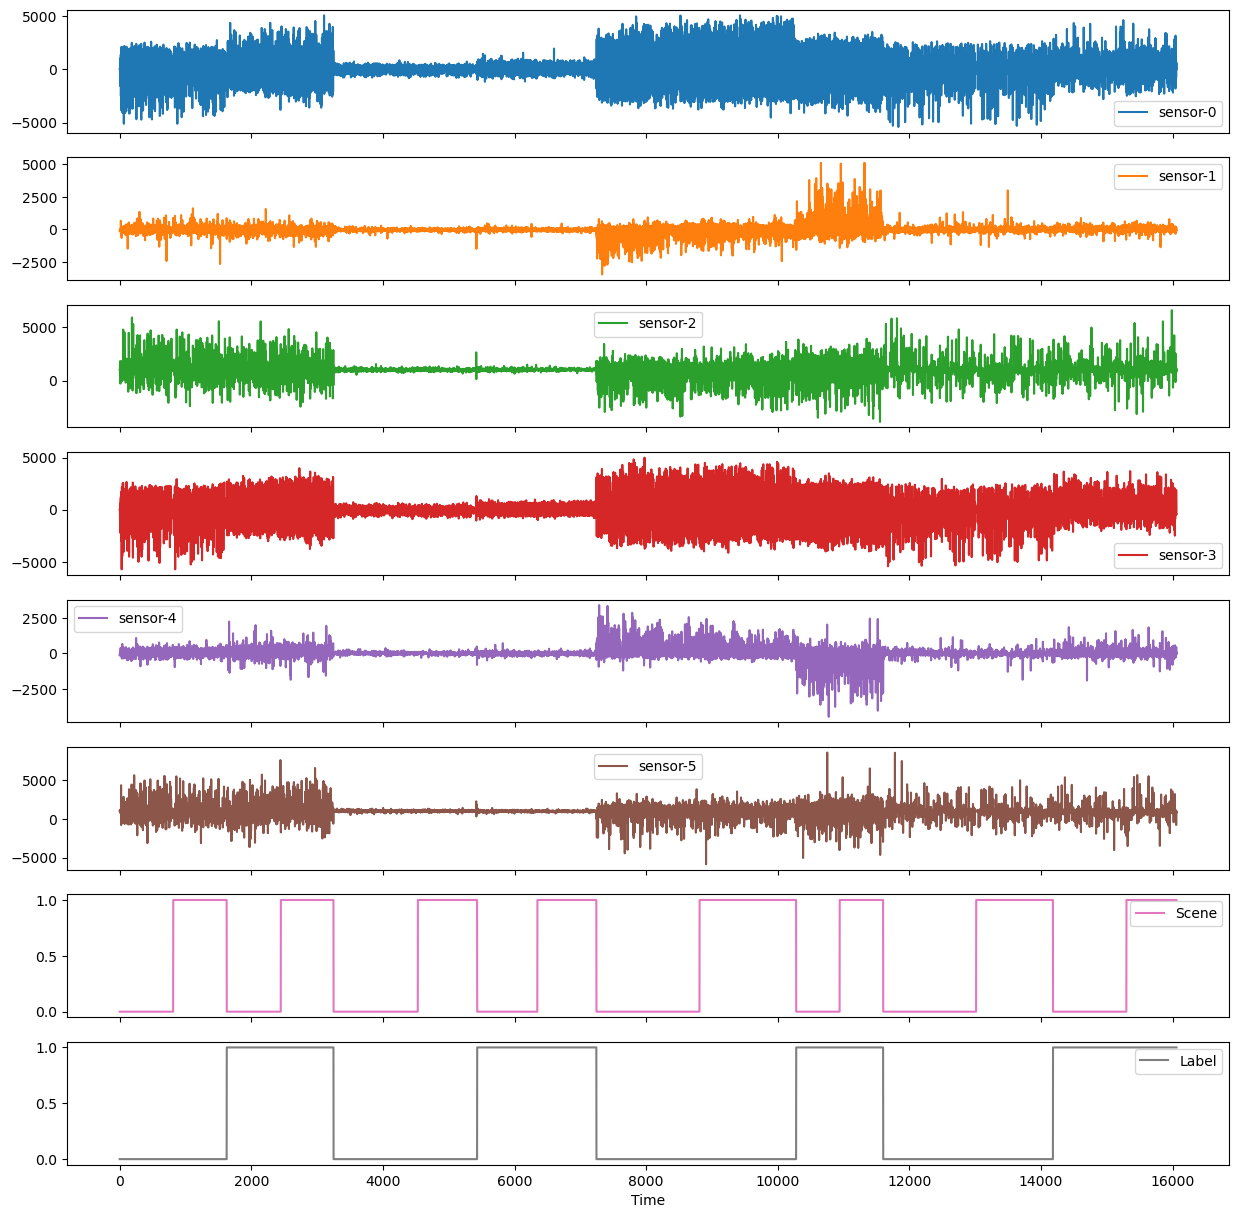

In [7]:
def prinUserSensorMatrix(S,L,Y):
    df = pd.DataFrame()
    ts=[]
    ls=[]
    
    for t in range(0,X.shape[0]):
        ts.append(t)
    df['Time']=ts
    #print(ts)
    for s in range(0,X.shape[2]):
        ls.append("sensor-"+str(s))
        vs=S[:,:,s]
        vs=vs[:,0]
        print(vs.shape)
        df["sensor-"+str(s)]=vs
    

    
    ss=[]
    for t in range(0,X.shape[0]):
        ss.append(L[t])
    df['Scene']=ss
    ls.append('Scene')
    
    ys=[]
    for t in range(0,X.shape[0]):
        ys.append(Y[t])
    df['Label']=ys
    ls.append('Label')

    print(ls)
    
    df.plot(x="Time",y=ls,subplots=True, legend=True, figsize=(15,15))    
    
prinUserSensorMatrix(X,S,Y)

In [8]:
print(X)       
print(X.shape)       

[[[    8.44008621  -105.00581159  1000.53         -10.10964196
    -123.74865822  1017.26      ]
  [    8.18751305  -103.28028834  1000.53         -10.25706503
    -123.10097459  1015.805     ]
  [    7.9340997   -105.48298512   998.59         -10.38450351
    -123.48190867  1013.38      ]
  ...
  [    9.01229349  -102.60082793   999.315         -9.03856798
    -122.54879193  1011.685     ]
  [    8.70385532  -102.81969547   998.59         -10.03676252
    -121.29115427  1012.65      ]
  [   10.39819132  -101.21329144   996.65         -10.79578233
    -121.18144284  1013.14      ]]

 [[    9.31423169  -103.04606016  1001.5           -9.6079408
    -123.81292373  1014.59      ]
  [    9.25090239  -102.44948281  1001.5           -9.80458682
    -122.73104455  1017.99      ]
  [    7.8638639   -103.80702266  1000.53          -9.40073455
    -122.30804522  1014.835     ]
  ...
  [    7.29201656  -106.33910891   998.345        -10.02071057
    -127.23840099  1012.895     ]
  [    8.49487486

In [9]:
Y=to_categorical(Y)

In [10]:
print("nan:",np.argwhere(np.isnan(X)))
print(X[np.argwhere(np.isnan(X))])

nan: []
[]


In [11]:
from tensorflow import keras

from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.layers import MaxPooling2D,Activation, Dense

from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv1D, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense,Dropout,LSTM,TimeDistributed,MaxPooling1D
from tensorflow.keras.models import Model

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt



classes=["Beret","Snozone"]

Y_pred_total=np.array([])
Y_val_total=np.array([])


for sceneid in np.unique(S):

    print("SCENE:",sceneid)
    index_test=np.where(S == sceneid)[0]
    index_train=np.where(S != sceneid)[0]

    print("index_test",index_test)
    print("index_train",index_train)

    x_train=X[index_train]
    x_val=X[index_test]
    y_train=Y[index_train]
    y_val=Y[index_test]

    #normalizamos valores (18 valores=6 señales imu x 3 sensores)
    for ixv in range(0,X.shape[2]):
        print(x_train[:,:,ixv])
        avg_v=np.nanmean(x_train[:,:,ixv].flatten())
        std_v=np.nanstd(x_train[:,:,ixv].flatten())
        print("avg_v,std_v:",avg_v,std_v)
        x_train[:,:,ixv]=(x_train[:,:,ixv]-avg_v)/(std_v)
        x_val[:,:,ixv]=(x_val[:,:,ixv]-avg_v)/(std_v)

    model = keras.Sequential()

    model.add(Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(X.shape[1],X.shape[2])))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(Dropout(0.25))

    model.add(LSTM(256, return_sequences=True))
    model.add(Dropout(0.25))
    model.add(LSTM(256))

    model.add(Flatten())
    model.add(Dense(2048))
    model.add(Dense(1024))
    model.add(Dense(len(classes), activation="softmax"))

    model.compile(loss='categorical_crossentropy', optimizer='rmsprop',  metrics=['accuracy'])
    model.summary()

    history = model.fit(x_train , y_train,
                        batch_size=64,
                validation_data=(x_val,y_val),
                epochs=25)


    y_pred = model.predict(x_val).argmax(axis=1)
    y_val=y_val.argmax(axis=1)
    print(y_pred)
    print(y_val)
    Y_pred_total=np.concatenate((Y_pred_total,y_pred))
    Y_val_total=np.concatenate((Y_val_total,y_val))

    

    

SCENE: 0
index_test [    0     1     2 ... 15293 15294 15295]
index_train [  813   814   815 ... 16055 16056 16057]
[[    8.18751305     7.95344411     7.9340997  ...     8.79136341
      8.7203261     10.2687539 ]
 [    9.13428958     8.53857753     7.8638639  ...     7.20007504
      8.40424059     8.34423421]
 [    9.12703921     8.05352501     9.06463133 ...     7.40733457
      7.18264875     6.70852493]
 ...
 [  625.82918823   615.69371463   608.66273751 ...  3047.33861993
  -2240.91567972 -1982.32568702]
 [  268.16404129   495.90924143   631.92190867 ...  1568.97507814
   1607.344184    1343.04641113]
 [    4.54263604     4.54263604   -56.5254514  ...  1464.35542828
   1621.74443383  1537.11371634]]
avg_v,std_v: 47.033827803406766 1244.4519762838527
[[-103.15286043 -105.89844626 -106.02910537 ... -102.26014924
  -102.68425326 -101.91265217]
 [-103.88064437 -102.39544189 -103.32627833 ... -106.67669495
  -104.2157651  -102.20435272]
 [-107.0801006  -106.51741146 -103.61332685 ...

Epoch 19/25
117/117 [==============================] - 230s 2s/step - loss: 0.0098 - accuracy: 0.9988 - val_loss: 0.0026 - val_accuracy: 0.9994
Epoch 20/25
117/117 [==============================] - 234s 2s/step - loss: 2.4460e-05 - accuracy: 1.0000 - val_loss: 6.7961e-04 - val_accuracy: 0.9999
Epoch 21/25
117/117 [==============================] - 236s 2s/step - loss: 9.5309e-04 - accuracy: 0.9997 - val_loss: 0.0025 - val_accuracy: 0.9994
Epoch 22/25
117/117 [==============================] - 236s 2s/step - loss: 8.5610e-06 - accuracy: 1.0000 - val_loss: 0.0183 - val_accuracy: 0.9971
Epoch 23/25
117/117 [==============================] - 237s 2s/step - loss: 0.0105 - accuracy: 0.9985 - val_loss: 0.0025 - val_accuracy: 0.9995
Epoch 24/25
117/117 [==============================] - 227s 2s/step - loss: 2.4860e-05 - accuracy: 1.0000 - val_loss: 7.0732e-04 - val_accuracy: 0.9999
Epoch 25/25
269/269 [==============================] - 34s 123ms/step
[0 0 0 ... 1 1 1]
[0 0 0 ... 1 1 1]
SCENE:

135/135 [==============================] - 275s 2s/step - loss: 0.0265 - accuracy: 0.9930 - val_loss: 0.0297 - val_accuracy: 0.9936
Epoch 12/25
135/135 [==============================] - 276s 2s/step - loss: 0.0129 - accuracy: 0.9974 - val_loss: 0.0384 - val_accuracy: 0.9910
Epoch 13/25
135/135 [==============================] - 281s 2s/step - loss: 0.0358 - accuracy: 0.9962 - val_loss: 0.2538 - val_accuracy: 0.9505
Epoch 14/25
135/135 [==============================] - 280s 2s/step - loss: 0.0108 - accuracy: 0.9977 - val_loss: 0.0410 - val_accuracy: 0.9909
Epoch 15/25
135/135 [==============================] - 279s 2s/step - loss: 1.1917e-05 - accuracy: 1.0000 - val_loss: 0.0391 - val_accuracy: 0.9942
Epoch 16/25
135/135 [==============================] - 280s 2s/step - loss: 0.0167 - accuracy: 0.9978 - val_loss: 0.0706 - val_accuracy: 0.9873
Epoch 17/25
135/135 [==============================] - 287s 2s/step - loss: 0.0074 - accuracy: 0.9971 - val_loss: 0.0146 - val_accuracy: 0.9964


[0. 0. 0. ... 1. 1. 1.]
[0. 0. 0. ... 1. 1. 1.]
[[9418    5]
 [  91 6544]]
Classification Report TOTAL
              precision    recall  f1-score   support

       Beret       0.99      1.00      0.99      9423
     Snozone       1.00      0.99      0.99      6635

    accuracy                           0.99     16058
   macro avg       0.99      0.99      0.99     16058
weighted avg       0.99      0.99      0.99     16058



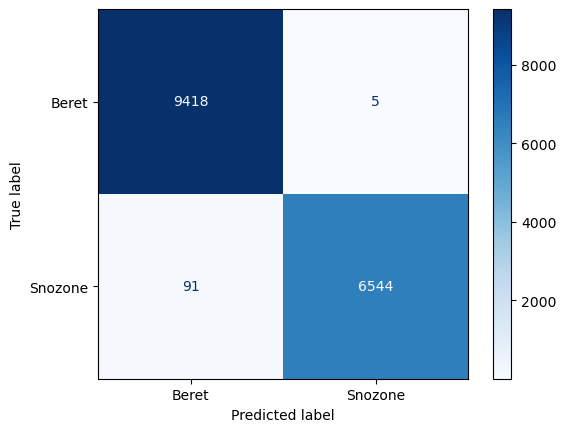

In [12]:
print(Y_pred_total)
print(Y_val_total)

cm = confusion_matrix(Y_val_total, Y_pred_total) 
print(cm)
print('Classification Report TOTAL')
print(classification_report(Y_val_total, Y_pred_total, target_names=classes))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

disp.plot(cmap=plt.cm.Blues)
plt.show()